## Introduction

The Sustainable Agriculture Dataset in India addresses the critical need for accurate data to support the agricultural ecosystem. It empowers stakeholders to make informed decisions, optimize processes, and drive sustainable practices. The dataset includes information on commodity prices, weather, land usage, crop yield, inputs, pests, and more. By providing access to up-to-date information, it enables informed decision-making, improves productivity, and fosters sustainability. This dataset revolutionizes the agricultural sector, bridging the data gap, and creating a resilient and sustainable future for Indian agriculture.


## Load the required packages

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load dataset

In [2]:
# Load the dataset from a CSV file
data = pd.read_csv("Dataset/csv")

In [3]:
data.head(5)

state       district      market              commodity  \
0  Andaman and Nicobar  South Andaman  Port Blair             Amaranthus   
1  Andaman and Nicobar  South Andaman  Port Blair         Banana - Green   
2  Andaman and Nicobar  South Andaman  Port Blair  Bhindi(Ladies Finger)   
3  Andaman and Nicobar  South Andaman  Port Blair           Bitter gourd   
4  Andaman and Nicobar  South Andaman  Port Blair           Black pepper   

          variety arrival_date  min_price  max_price  modal_price  
0      Amaranthus   04/03/2019       6000       8000         7000  
1  Banana - Green   04/03/2019       4500       5500         5000  
2          Bhindi   04/03/2019       6000       8000         7000  
3           Other   04/03/2019       6000       8000         7000  
4           Other   04/03/2019     110000     130000       120000

## Data Preprocessin
1. Check for missing values and handle them appropriately (e.g., imputation or removal).

2. Convert the "arrival_date" column to a suitable date format if needed.

3. Explore and clean the data to ensure data integrity and consistency.

In [4]:
# Lets check dataset overview and format
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   state         2238 non-null   object
 1   district      2238 non-null   object
 2   market        2238 non-null   object
 3   commodity     2238 non-null   object
 4   variety       2238 non-null   object
 5   arrival_date  2238 non-null   object
 6   min_price     2238 non-null   int64 
 7   max_price     2238 non-null   int64 
 8   modal_price   2238 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 157.5+ KB


In [ ]:
# Check for Missing or Null or NA values in data
data.isnull().any()

In [ ]:
data.isnull().sum()

In [98]:
data.isna().sum()

state           0
district        0
market          0
commodity       0
variety         0
arrival_date    0
min_price       0
max_price       0
modal_price     0
year            0
dtype: int64

> <font color=green> Number of missing values: 0 </font>

In [8]:
# Convert "arrival_date" column to a suitable date format
data['arrival_date'].unique()

array(['04/03/2019'], dtype=object)

In [ ]:
# data['arrival_date']

In [10]:
# datetime in string format for list of dates
def ChangeDateFormat(input, format):
    old_value =[]
    new_val =[]
    for i in input:
 
        # convert from string format to datetime format
        # and get the date
        
        old_value.append(i)
        new_value = datetime.strptime(i, format)
        new_val.append(new_value)   
    data['arrival_date'] = data['arrival_date'].replace(old_value, new_value)
    print('Format change')

In [11]:
fort = '%m/%d/%Y'
ChangeDateFormat(data['arrival_date'], fort)

Format change


In [12]:
data.head(5)

state       district      market              commodity  \
0  Andaman and Nicobar  South Andaman  Port Blair             Amaranthus   
1  Andaman and Nicobar  South Andaman  Port Blair         Banana - Green   
2  Andaman and Nicobar  South Andaman  Port Blair  Bhindi(Ladies Finger)   
3  Andaman and Nicobar  South Andaman  Port Blair           Bitter gourd   
4  Andaman and Nicobar  South Andaman  Port Blair           Black pepper   

          variety arrival_date  min_price  max_price  modal_price  
0      Amaranthus   2019-04-03       6000       8000         7000  
1  Banana - Green   2019-04-03       4500       5500         5000  
2          Bhindi   2019-04-03       6000       8000         7000  
3           Other   2019-04-03       6000       8000         7000  
4           Other   2019-04-03     110000     130000       120000

In [ ]:
# Get list of unique values of commodities

commodity_list = list(data['commodity'].unique())
print("List of Commodities: \n", *commodity_list, sep= '\n')

In [ ]:
# Get unique values of varieties
variety_list = list(data['variety'].unique())
print("List of variety: \n", *variety_list, sep= '\n')

In [ ]:
# Get unique values of districts
district_list = list(data['district'].unique())
print("List of districts: \n", *district_list, sep= '\n')

In [ ]:
# Get unique values of markets
market_list = list(data['market'].unique())
print('List of Markets: \n', *market_list, sep = '\n')

In [17]:
# Explore and clean the data
# Check for data integrity and consistency
data.describe()

min_price      max_price    modal_price
count    2238.000000    2238.000000    2238.000000
mean     2456.230563    2855.890527    2698.865952
std      3452.497680    3917.251520    3694.830905
min         0.000000       0.000000       2.000000
25%       800.000000    1000.000000     950.000000
50%      1700.000000    1960.000000    1831.500000
75%      3200.000000    3700.000000    3500.000000
max    110000.000000  130000.000000  120000.000000

In [18]:
# Perform additional data cleaning steps if necessary
# For example, removing duplicate rows:

# Ckeck for coloum who have duplicate values
data[data.duplicated()].any()

state           True
district        True
market          True
commodity       True
variety         True
arrival_date    True
min_price       True
max_price       True
modal_price     True
dtype: bool

In [19]:
# Lets find the Duplicate values in data
data[data.duplicated()]

state    district market commodity variety arrival_date  min_price  \
1024  Odisha  Sundergarh  Bonai    Orange   Other   2019-04-03       8000   
1025  Odisha  Sundergarh  Bonai    Orange   Other   2019-04-03       8000   

      max_price  modal_price  
1024       8000         8000  
1025       8000         8000

In [20]:
# we found the duplicate row in database lets remove it

# we keep the first row and drop another 
data = data.drop_duplicates()

In [21]:
# Check
data[data.duplicated()].any()

state           False
district        False
market          False
commodity       False
variety         False
arrival_date    False
min_price       False
max_price       False
modal_price     False
dtype: bool

## Descriptive Analysis

1. Calculate basic statistics (e.g., mean, median, mode, range, standard deviation) for relevant numerical columns (min_price, max_price, modal_price).

2. Identify the unique values and their frequencies for categorical columns (state, district, market, commodity, variety).

3. Visualize the data using plots (e.g., histograms, box plots, bar charts) to gain insights into the distribution and relationships between variables.

In [22]:
# Calculate basic statistics for numerical columns
def stat(col):
    l = data[col]
    mean = l.mean()
    median = l.median()
    mode = l.mode()
    price_range = max(l)-min(l)
    sd = l.std()
    print('mean= ', mean, '\n', 'median= ', median, '\n', 'mode= ', mode, '\n', 'standard deviation= ', sd)



In [23]:
stat("min_price")

mean=  2451.271914132379 
 median=  1700.0 
 mode=  0    1000
Name: min_price, dtype: int64 
 standard deviation=  3450.0550956710877


In [24]:
stat("max_price")

mean=  2851.2893559928443 
 median=  1957.5 
 mode=  0    1000
Name: max_price, dtype: int64 
 standard deviation=  3915.9788288273594


In [25]:
stat('modal_price')

mean=  2694.1243291592127 
 median=  1830.0 
 mode=  0    1000
1    1500
Name: modal_price, dtype: int64 
 standard deviation=  3693.077586108721


In [ ]:
# Identify unique values and their frequencies for categorical columns

# here we use pandas value_counts() function, it return unique value and its frequency of occurance dataframe

print(data['state'].value_counts())
print(data['district'].value_counts())
print(data['market'].value_counts())
print(data['commodity'].value_counts())
print(data['variety'].value_counts())
print(data['arrival_date'].value_counts())

In [27]:
# counting unique values
uni_state = len(pd.unique(data['state']))
uni_district = len(pd.unique(data['district']))
uni_market = len(pd.unique(data['market']))
uni_commodity = len(pd.unique(data['commodity']))
uni_variety = len(pd.unique(data['variety']))
print('uni_state= ', uni_state, '\n', 'uni_district= ', uni_district, '\n', 'uni_market= ',
      uni_market, '\n', 'uni_commodity= ', uni_commodity, '\n', 'uni_variety= ', uni_variety)

uni_state=  26 
 uni_district=  174 
 uni_market=  326 
 uni_commodity=  156 
 uni_variety=  218


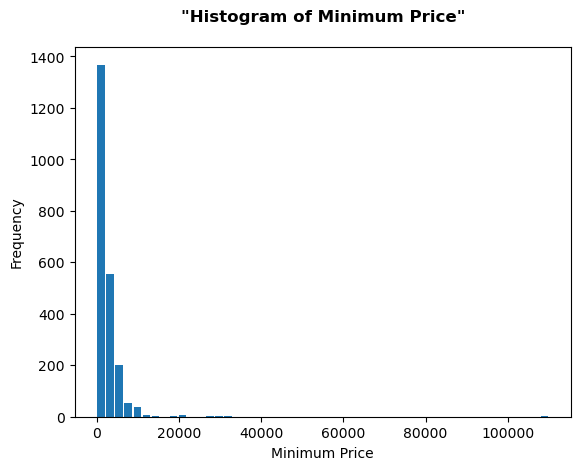

In [28]:
# Histogram for min_price
x = data['min_price']
plt.hist(x,histtype ='bar', bins= 50, rwidth=0.85)

plt.xlabel("Minimum Price")
plt.ylabel("Frequency")
plt.title('"Histogram of Minimum Price"\n',
          fontweight = "bold")
plt.show() 

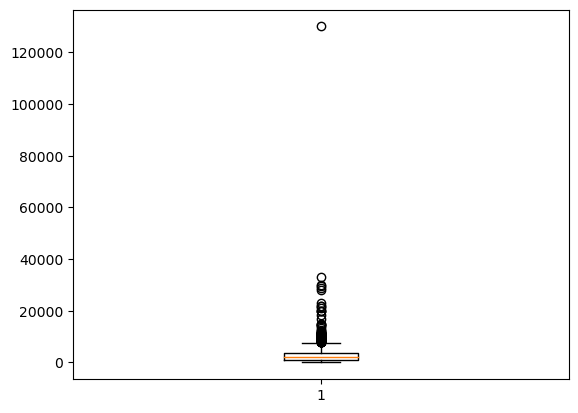

In [29]:
# Box plot for max_price
# Creating plot
plt.boxplot(data['max_price'])

# show plot
plt.show()

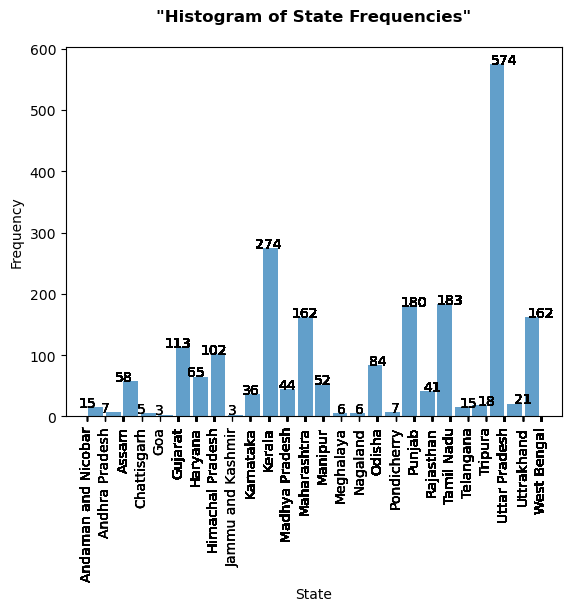

In [30]:
# Bar chart for state frequencies
x = data['state']
n_bins = len(x.unique())
plt.hist(x, n_bins ,histtype ='bar',
         alpha=0.7,rwidth=0.85)

# function to add value labels
def addlabels(x):
    y = x.value_counts()
    for i in x:
        plt.text(i, y[i], y[i], ha = 'center')

addlabels(x)

# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, rotation='vertical')
plt.xlabel("State")
plt.ylabel("Frequency")
plt.title('"Histogram of State Frequencies"\n',
          fontweight = "bold")
plt.show() 

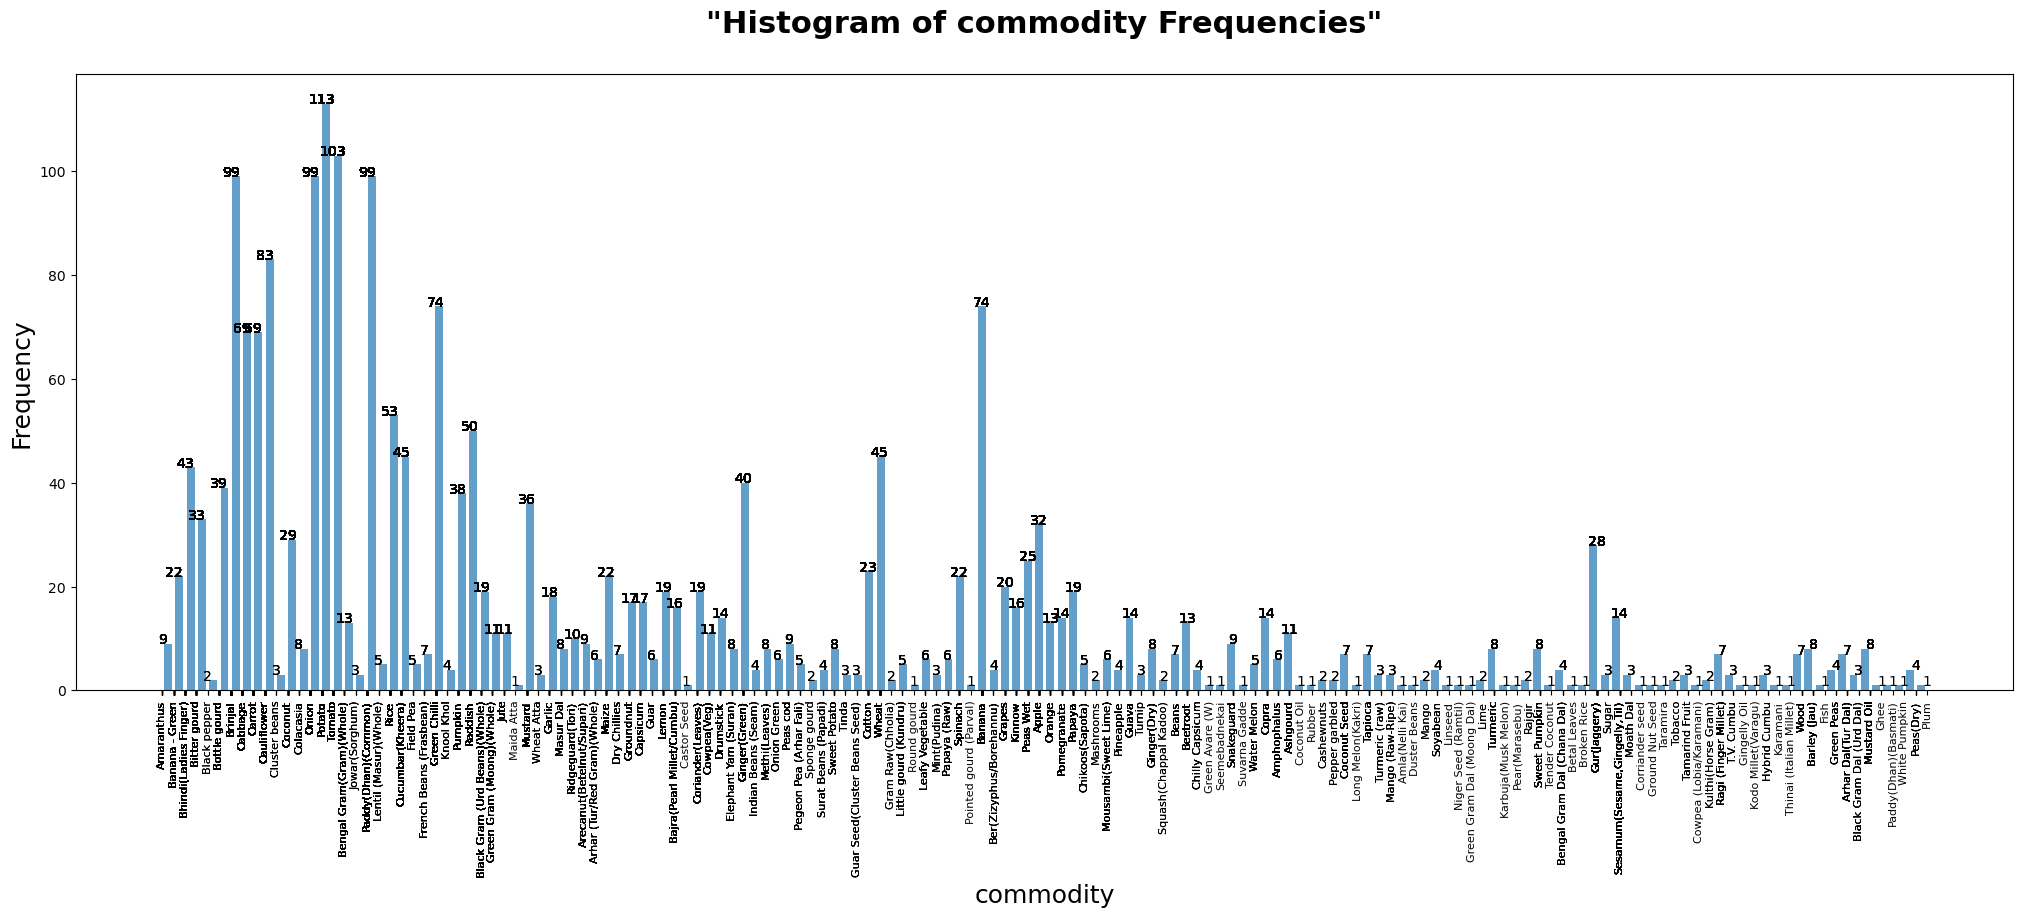

<Figure size 20000x60000 with 0 Axes>

In [31]:
# Bar chart for commodity frequencies

x = data['commodity']
n_bins = len(x.unique())
plt.figure(figsize=(25,8))
plt.hist(x, n_bins ,histtype ='bar',
         alpha=0.7, rwidth=0.7)

# function to add value labels
def addlabels(x):
    y = x.value_counts()
    for i in x:
        plt.text(i, y[i], y[i], ha = 'center')

addlabels(x)

# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, rotation='vertical')
plt.tick_params(axis='x', which='major', labelsize=8)
plt.xlabel("commodity", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.title('"Histogram of commodity Frequencies"\n',
          fontsize=22,
          fontweight = "bold")
plt.figure(figsize=(200,600))
plt.show() 

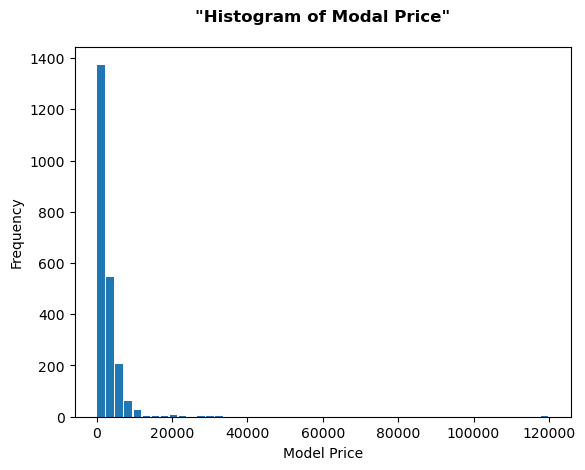

In [32]:
# Histogram for modal_price
x = data['modal_price']
plt.hist(x,histtype ='bar',bins = 50, rwidth=0.85)

plt.xlabel("Model Price")
plt.ylabel("Frequency")
plt.title('"Histogram of Modal Price"\n',
          fontweight = "bold")
plt.show() 

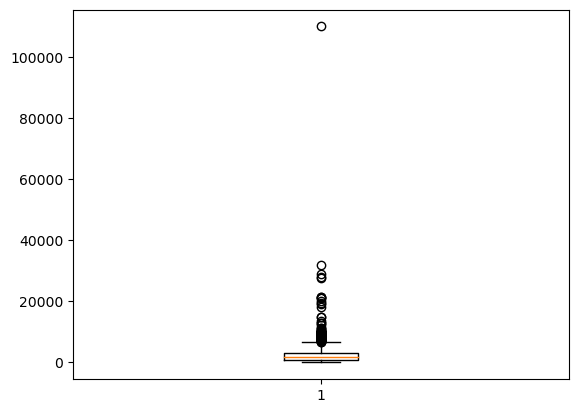

In [33]:
# Box plot for min_price
# Creating plot
plt.boxplot(data['min_price'])

# show plot
plt.show()

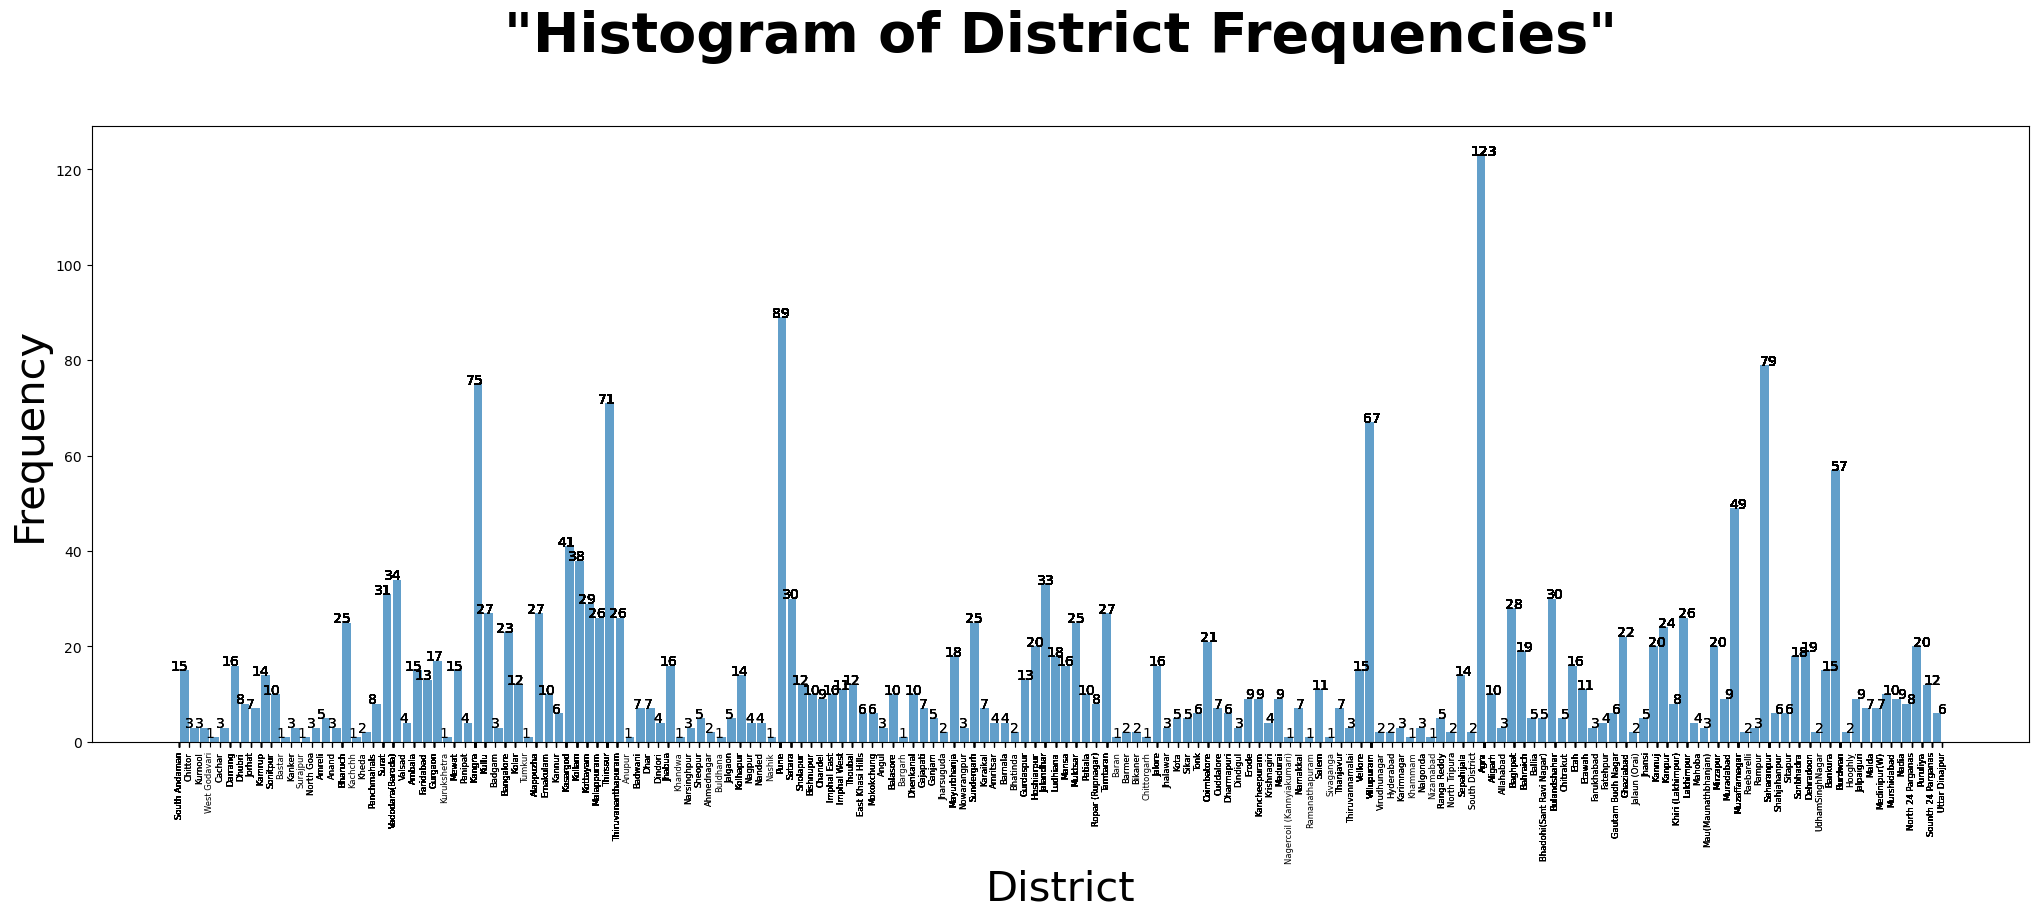

In [34]:
# Bar chart for district frequencies
x = data['district']
n_bins = len(x.unique())
plt.figure(figsize=(25,8))
plt.hist(x, n_bins ,histtype ='bar',
         alpha=0.7,rwidth=0.85)

# function to add value labels
def addlabels(x):
    y = x.value_counts()
    for i in x:
        plt.text(i, y[i], y[i], ha = 'center')

addlabels(x)

# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, rotation='vertical')
plt.tick_params(axis='x', which='major', labelsize=6)
plt.xlabel("District", fontsize=30)
plt.ylabel("Frequency", fontsize=30)
plt.title('"Histogram of District Frequencies"\n',
          fontsize=40,
          fontweight = "bold")
plt.show()

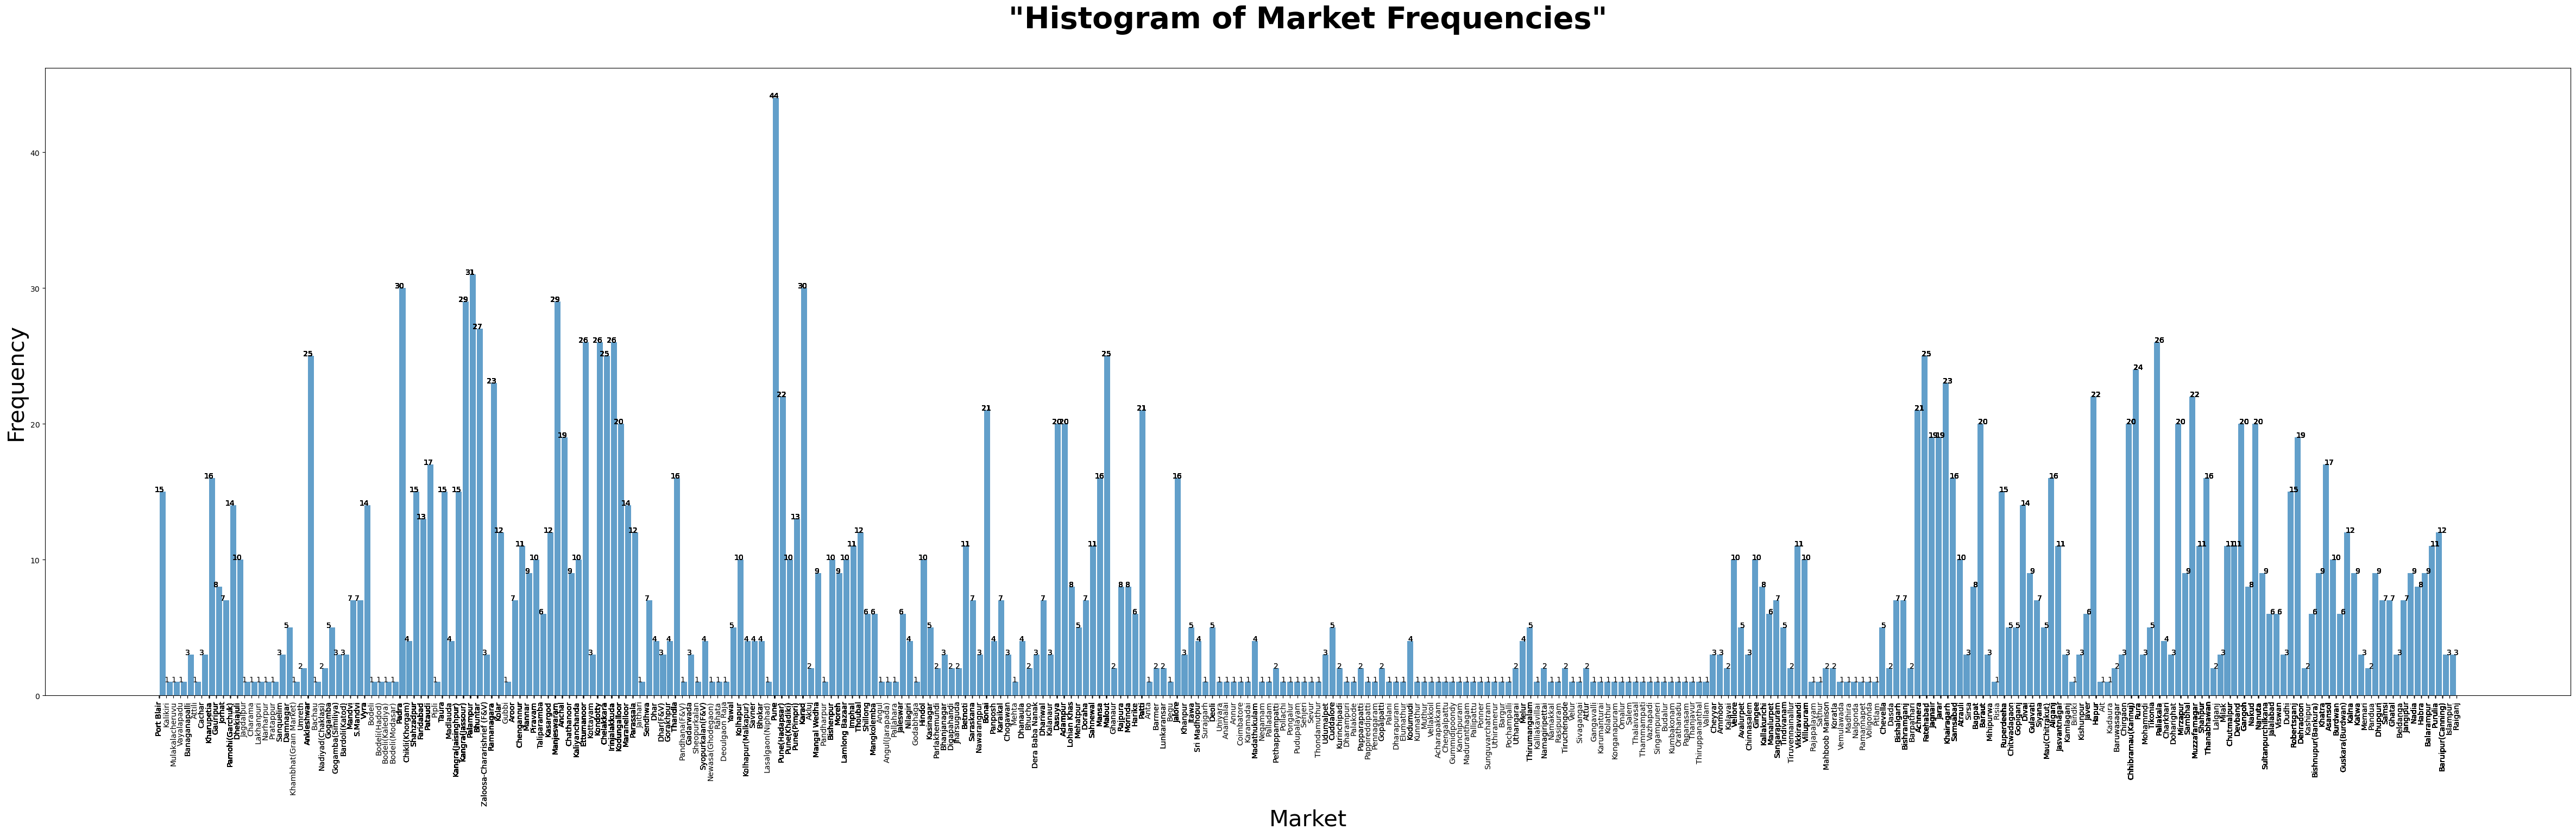

In [35]:
# Bar chart for market frequencies
x = data['market']
n_bins = len(x.unique())
plt.figure(figsize=(60,15))
plt.hist(x, n_bins ,histtype ='bar',
         alpha=0.7,rwidth=0.85)

# function to add value labels
def addlabels(x):
    y = x.value_counts()
    for i in x:
        plt.text(i, y[i], y[i], ha = 'center')

addlabels(x)

# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, rotation='vertical')
#plt.tick_params(axis='x', which='major', labelsize=8)
plt.xlabel("Market", fontsize=30)
plt.ylabel("Frequency", fontsize=30)
plt.title('"Histogram of Market Frequencies"\n',
          fontsize=40,
          fontweight = "bold")
plt.show()

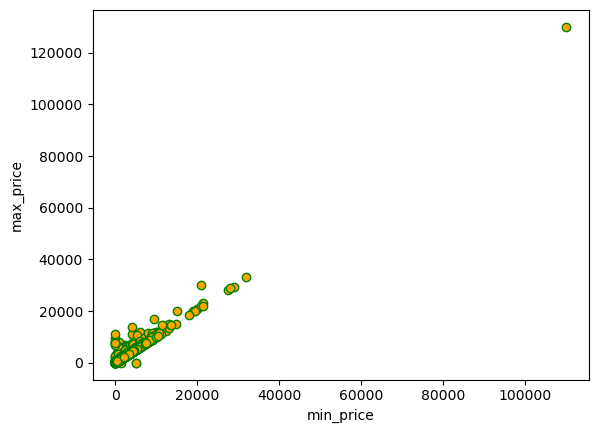

In [36]:
# Scatter plot for min_price vs. max_price
plt.scatter(data['min_price'], data['max_price'],  
            c ="orange", 
            linewidths = 1,
            edgecolor ="green")
plt.xlabel("min_price")
plt.ylabel("max_price")
plt.show()

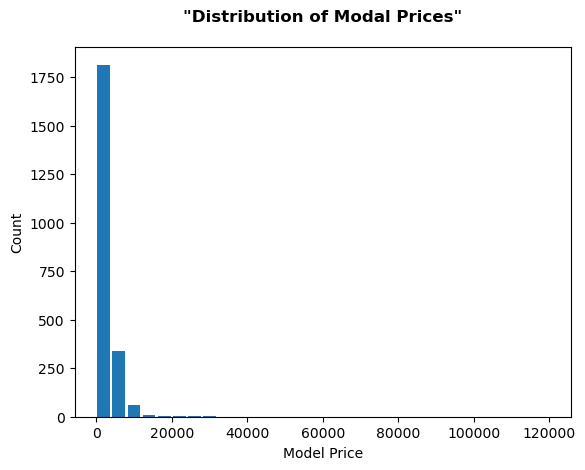

In [37]:
# Visualize the distributions of average prices
# Histogram for modal_price
x = data['modal_price']
plt.hist(x,histtype ='bar',bins = 30, rwidth=0.85)

plt.xlabel("Model Price")
plt.ylabel("Count")
plt.title('"Distribution of Modal Prices"\n',
          fontweight = "bold")
plt.show() 

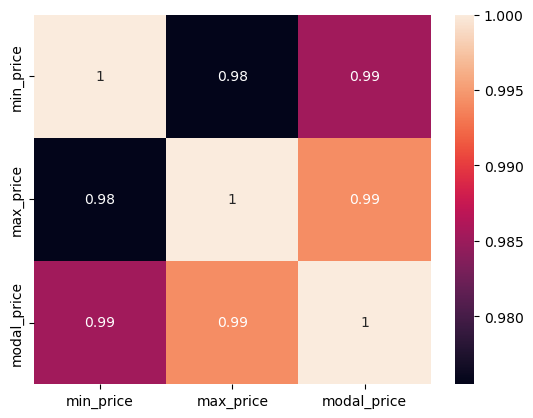

In [38]:
# Select the columns for correlation
df = pd.DataFrame(data, columns=['min_price', 'max_price', 'modal_price'])
#plotting the heatmap for correlation
ax = sns.heatmap(df.corr(), annot=True)

## Market Analysis

1. Analyze the market-wise trends by grouping the data based on the "market" column.

2. Identify the most and least expensive commodities based on the modal price.

3. Determine the top commodities traded in each market.

In [39]:
# Convert arrival_date column to Date type
data.dtypes

state                   object
district                object
market                  object
commodity               object
variety                 object
arrival_date    datetime64[ns]
min_price                int64
max_price                int64
modal_price              int64
dtype: object

In [40]:
from pandas.api.types import is_datetime64_dtype
is_datetime_column = is_datetime64_dtype(data["arrival_date"])
print(is_datetime_column)

True


In [ ]:
df = data.groupby(['market', 'arrival_date'])['modal_price'].mean()
df.first

In [42]:
df = data.groupby(['market', 'arrival_date'])['modal_price'].mean().reset_index()
df

market arrival_date  modal_price
0                   Acharapakkam   2019-04-03  1420.000000
1                        Achnera   2019-04-03  1567.619048
2                        Adampur   2019-04-03  2115.000000
3                            Ait   2019-04-03  1980.000000
4                          Akluj   2019-04-03  1700.000000
..                           ...          ...          ...
321                       Viswan   2019-04-03  1598.333333
322                    Voligonda   2019-04-03  1770.000000
323                         Vyra   2019-04-03  2355.142857
324                        Yawal   2019-04-03  2438.000000
325  Zaloosa-Chararishrief (F&V)   2019-04-03  1216.666667

[326 rows x 3 columns]

market
Acharapakkam                   Axes(0.125,0.11;0.775x0.77)
Achnera                        Axes(0.125,0.11;0.775x0.77)
Adampur                        Axes(0.125,0.11;0.775x0.77)
Ait                            Axes(0.125,0.11;0.775x0.77)
Akluj                          Axes(0.125,0.11;0.775x0.77)
                                          ...             
Viswan                         Axes(0.125,0.11;0.775x0.77)
Voligonda                      Axes(0.125,0.11;0.775x0.77)
Vyra                           Axes(0.125,0.11;0.775x0.77)
Yawal                          Axes(0.125,0.11;0.775x0.77)
Zaloosa-Chararishrief (F&V)    Axes(0.125,0.11;0.775x0.77)
Name: modal_price, Length: 326, dtype: object

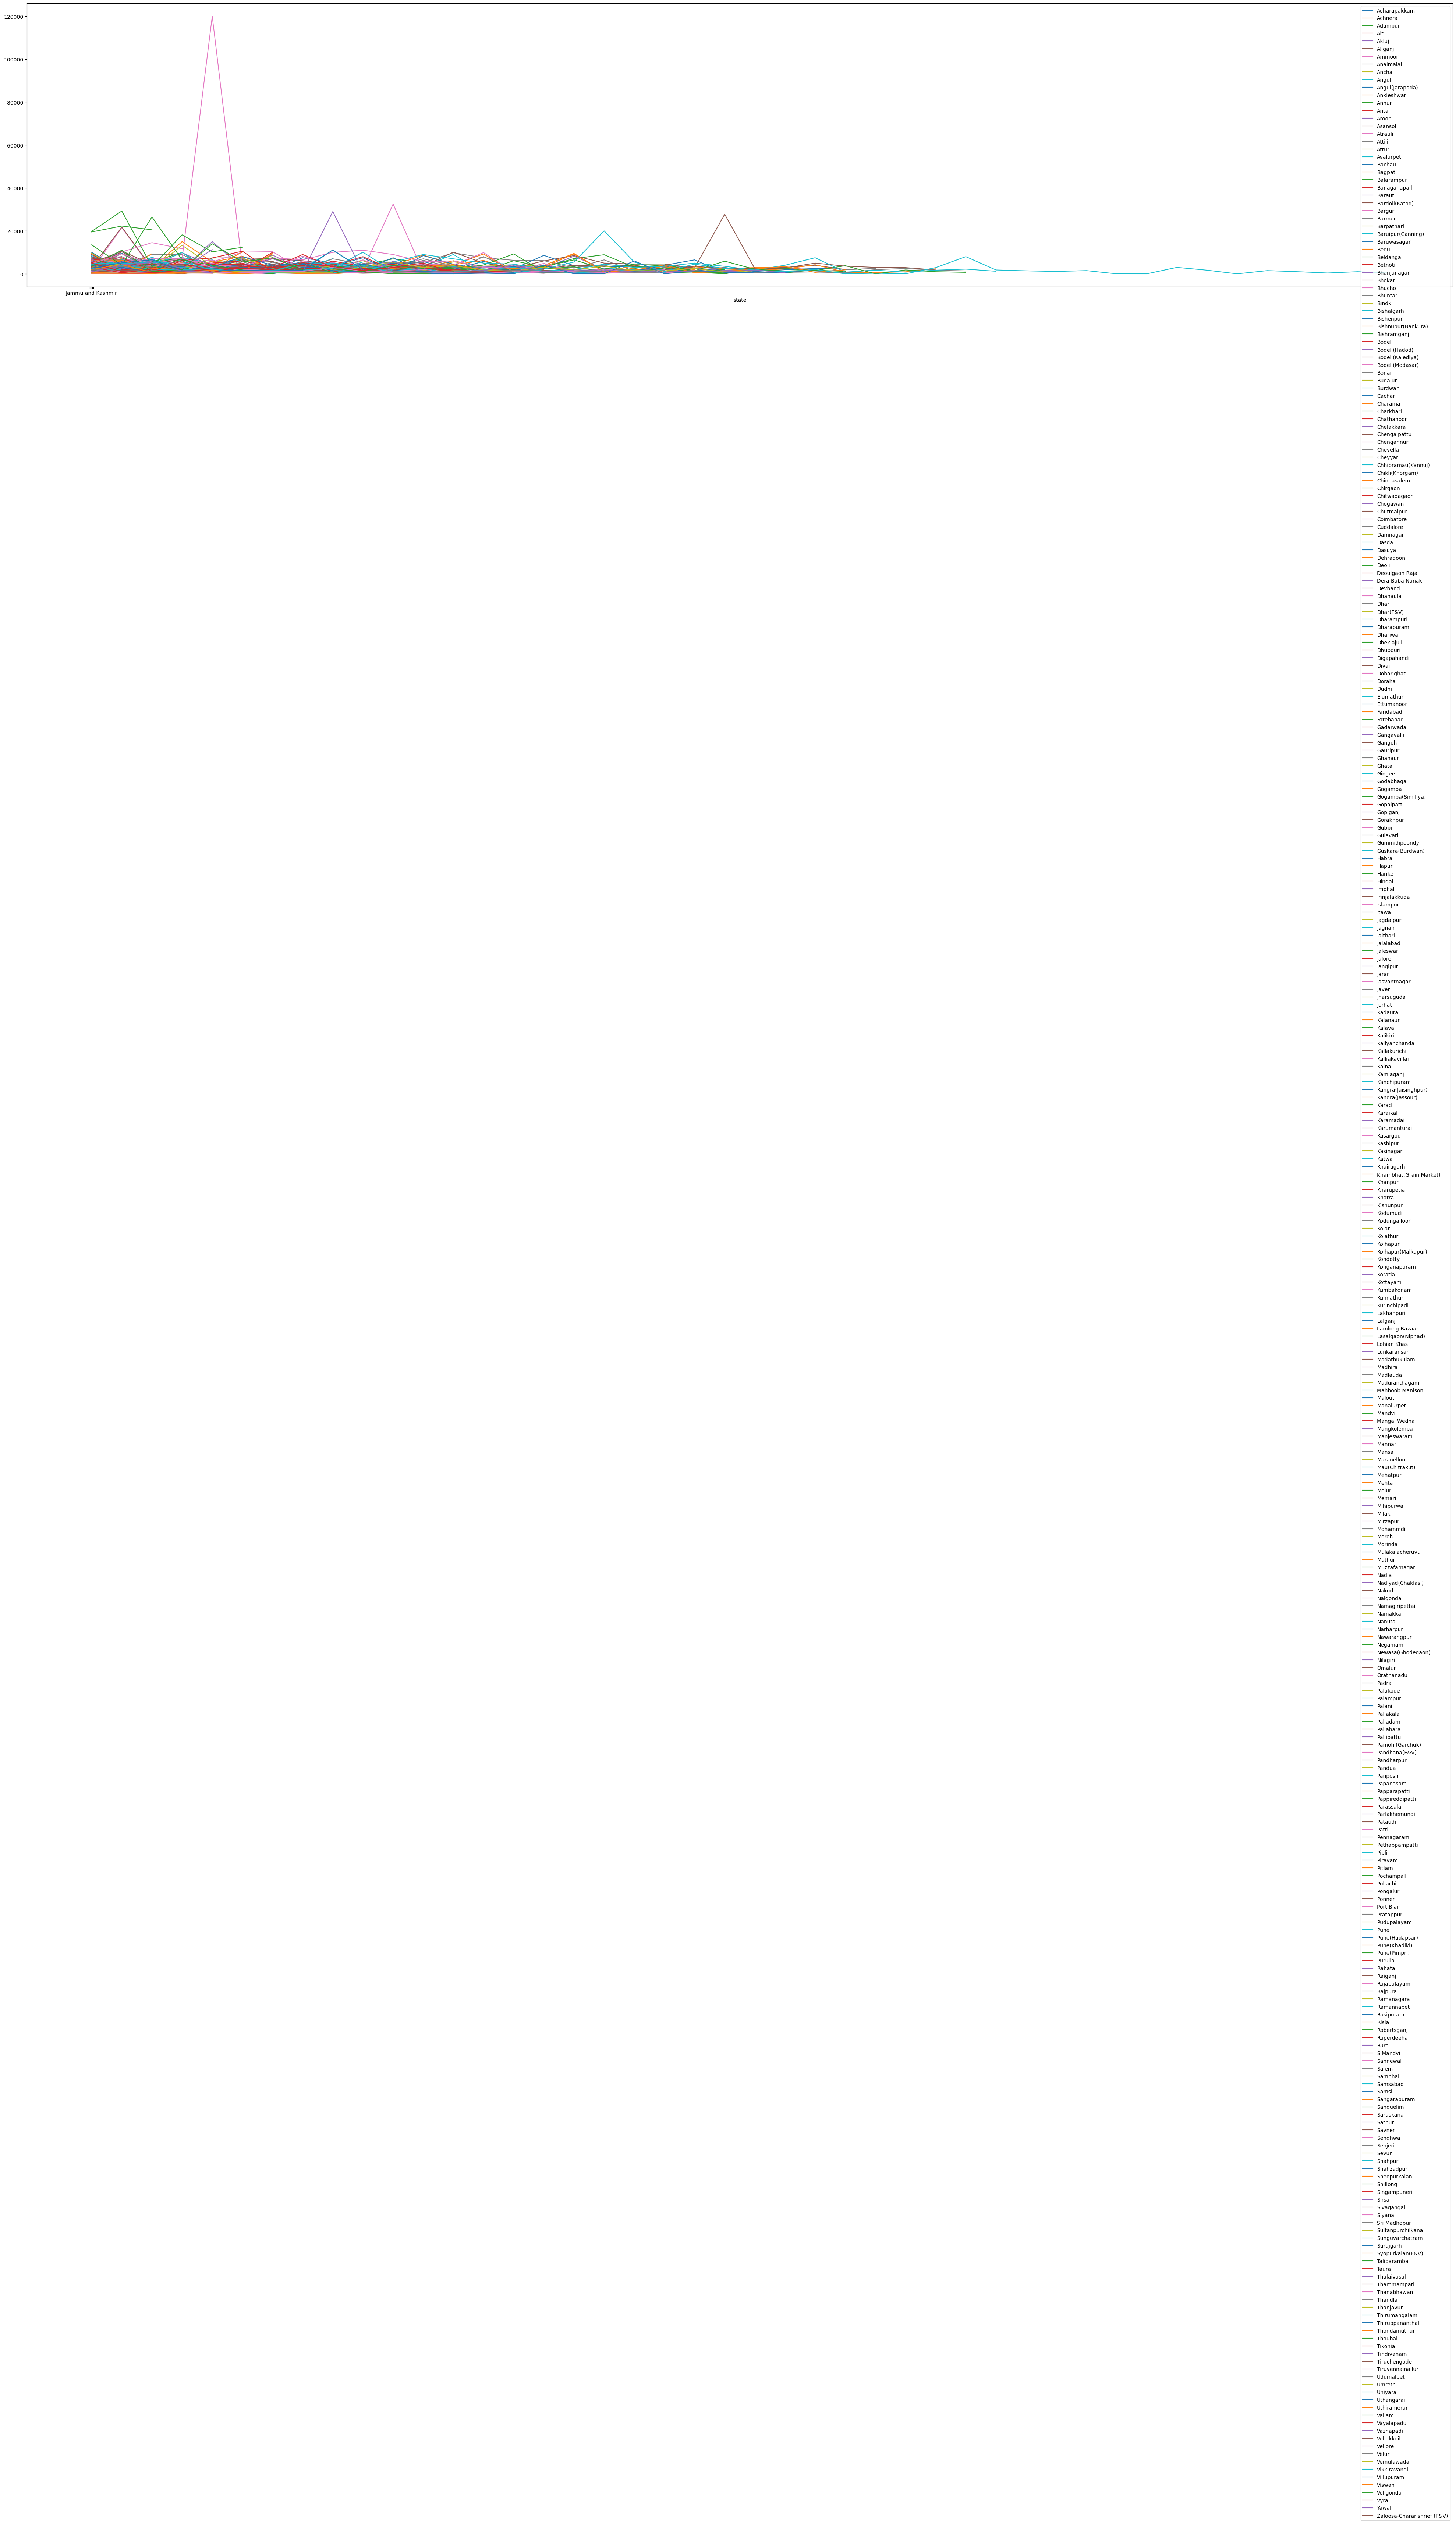

In [43]:
#group data by product and display sales as line chart
df = data.copy()
df.set_index('state', inplace=True)
df.groupby('market')['modal_price'].plot(figsize=(50, 10), legend=True)

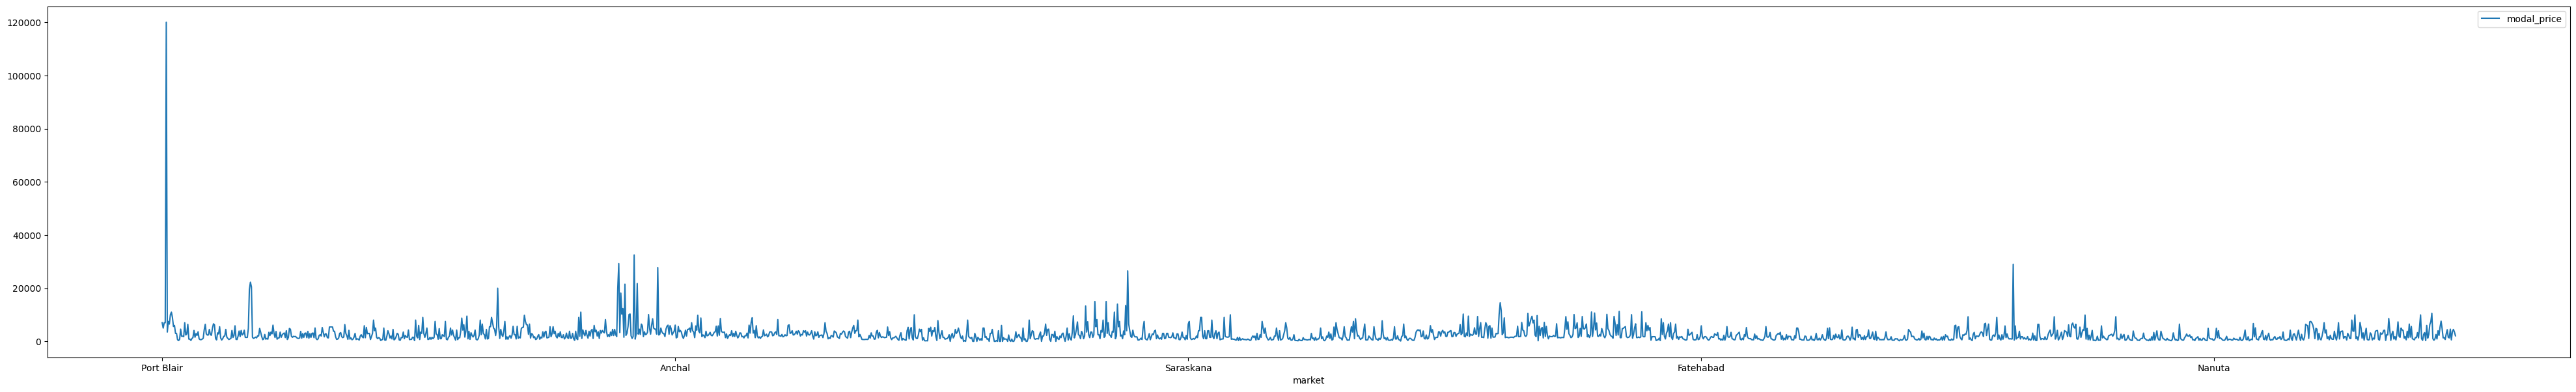

In [44]:
import pandas as pd
import matplotlib.pyplot as mp

# form dataframe from data
df = pd.DataFrame(data, columns=["market", "modal_price", "arrival_date"])

# plot multiple columns such as population and year from dataframe
df.plot(x="market", y="modal_price",
        kind="line", figsize=(50, 7))

# display plot
mp.show()


In [ ]:
df['market'].unique()

<Axes: >

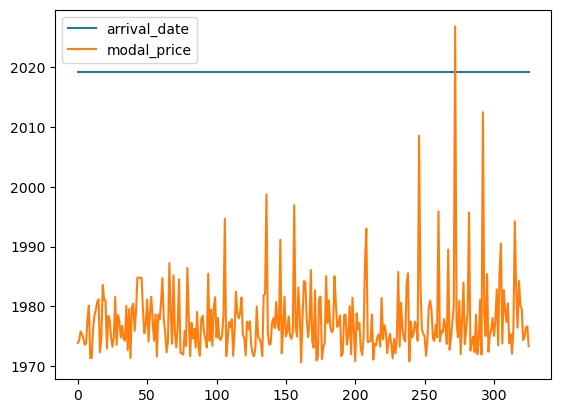

In [46]:
data.groupby(['market', 'arrival_date'])['modal_price'].mean().reset_index().plot()

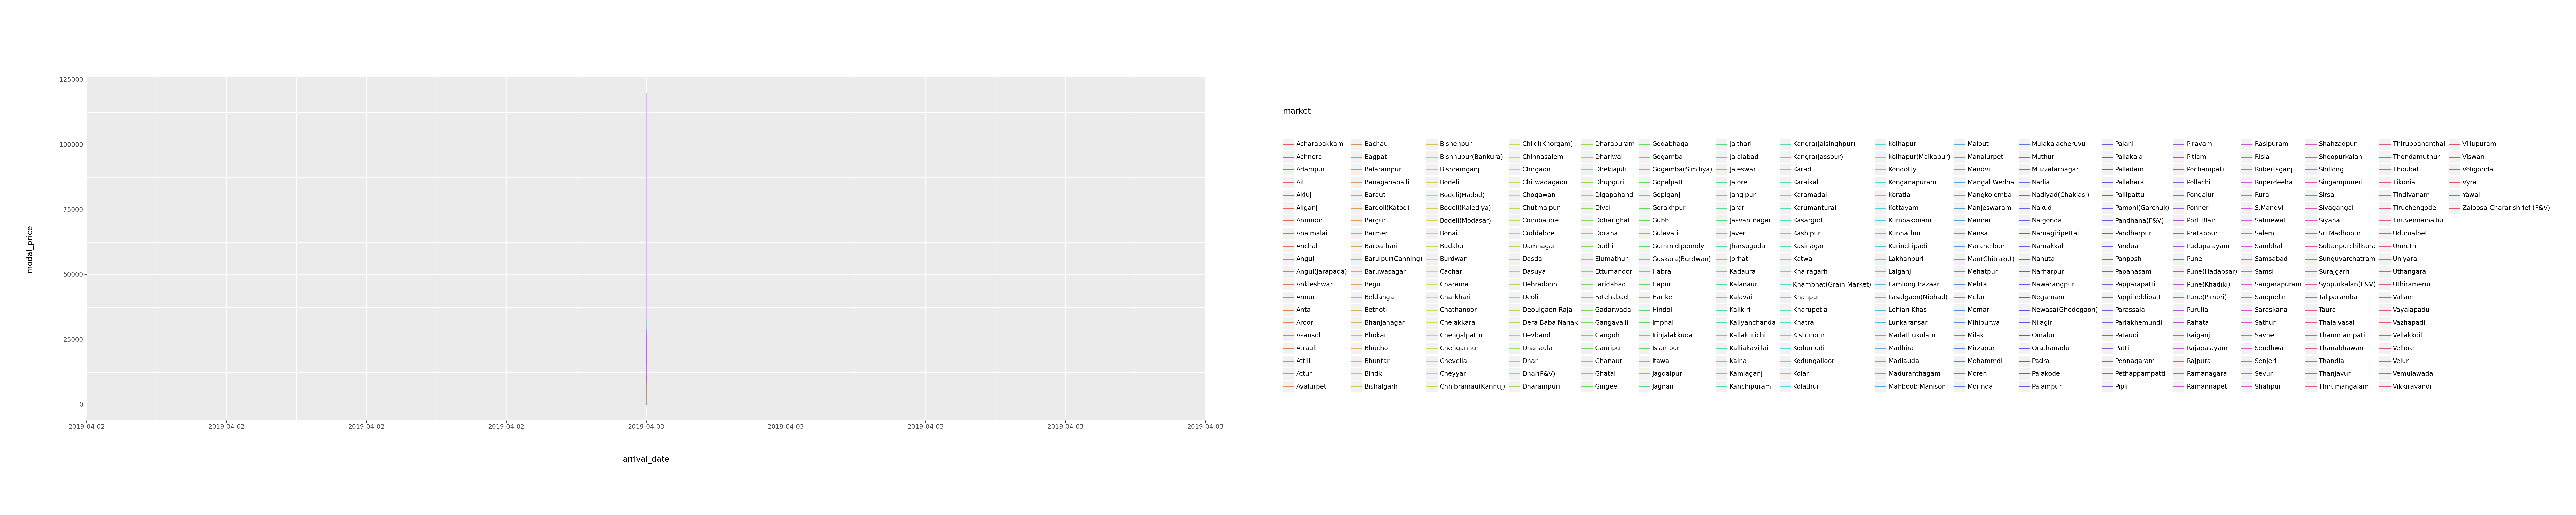

<Figure Size: (5000 x 1000)>

In [47]:
import pandas as pd
import plotnine as p9
from plotnine  import ggplot, aes, geom_line, theme


# plot the data
(ggplot(df, aes(x='arrival_date', y='modal_price', color='market', group= 2)) +
 geom_line() + 
 theme(figure_size=(50, 10))
)


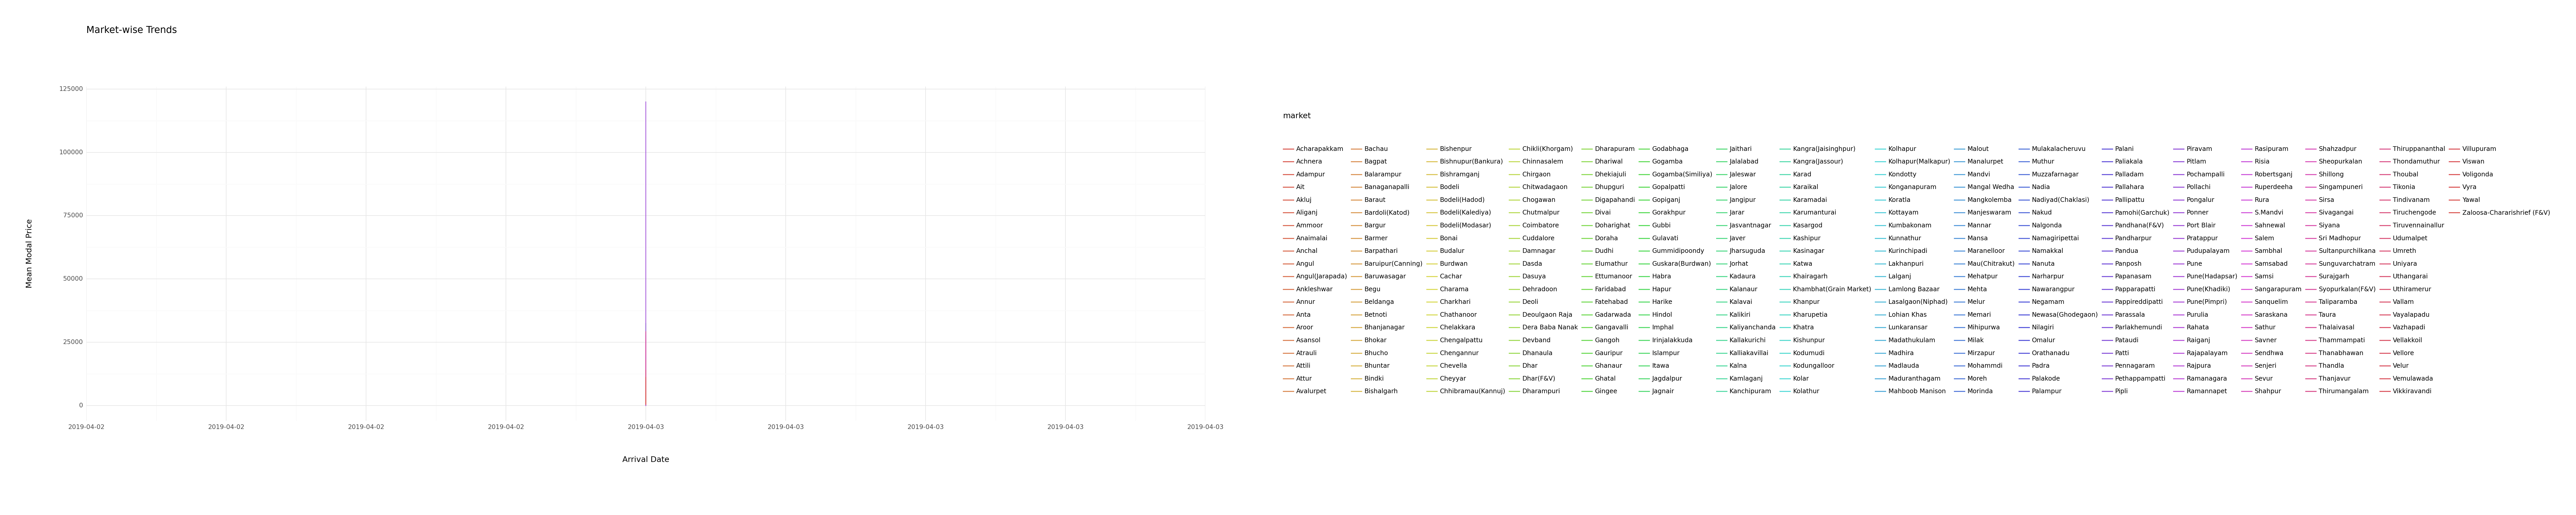

<Figure Size: (5000 x 1000)>

In [48]:
import pandas as pd
import plotnine as p9
from plotnine  import ggplot, aes, geom_line, labs, theme_minimal


# plot the data
(ggplot(df, aes(x = 'arrival_date', y = 'modal_price', color = 'market')) + geom_line() +labs(x = "Arrival Date", y = "Mean Modal Price", title = "Market-wise Trends") 
+theme_minimal()+ theme(figure_size=(50, 10)))


In [49]:
# Identify the most and least expensive commodities based on modal price
most_expensive_commodities = data.iloc[data.groupby('commodity')['modal_price'].agg(pd.Series.idxmax)]

''' 
    This code will group the data by commodity and 
    find the index of the row with the maximum modal price for each commodity. 
    It will then use these indices to select the 
    corresponding rows from the original data
'''

least_expensive_commodities = data.iloc[data.groupby('commodity')['modal_price'].agg(pd.Series.idxmin)]

''' 
    This code will group the data by commodity and 
    find the index of the row with the minimum modal price for each commodity. 
    It will then use these indices to select the 
    corresponding rows from the original data
'''

' \n    This code will group the data by commodity and \n    find the index of the row with the minimum modal price for each commodity. \n    It will then use these indices to select the \n    corresponding rows from the original data\n'

In [50]:
most_expensive_commodities

state           district      market  \
0     Andaman and Nicobar      South Andaman  Port Blair   
559                Kerala         Malappuram    Kondotty   
425                Kerala          Alappuzha      Mannar   
408                Kerala          Alappuzha       Aroor   
86                    Goa          North Goa   Sanquelim   
...                   ...                ...         ...   
979                Odisha           Gajapati   Kasinagar   
1033               Odisha         Sundergarh     Panposh   
1034               Odisha         Sundergarh     Panposh   
1831        Uttar Pradesh          Lakhimpur   Paliakala   
1823        Uttar Pradesh  Khiri (Lakhimpur)    Mohammdi   

                      commodity         variety arrival_date  min_price  \
0                    Amaranthus      Amaranthus   2019-04-03       6000   
559             Amla(Nelli Kai)           Other   2019-04-03       3700   
425                 Amphophalus           Other   2019-04-03       3500   
408                       Apple           Other   2019-04-03      10000   
86    Arecanut(Betelnut/Supari)          Supari   2019-04-03      21500   
...                         ...             ...          ...        ...   
979                 Water Melon           Other   2019-04-03       2500   
1033                    Brinjal           Other   2019-04-03        400   
1034                    Cabbage           Other   2019-04-03        600   
1831         Arhar Dal(Tur Dal)  Arhar Dal(Tur)   2019-04-03       6350   
1823                     Potato          F.A.Q.   2019-04-03        430   

      max_price  modal_price  
0          8000         7000  
559        3900         3800  
425        3700         3600  
408       11200        11000  
86        23000        22250  
...         ...          ...  
979        3000         3000  
1033        700          600  
1034        900          800  
1831       6410         6380  
1823        440          440  

[156 rows x 9 columns]

In [51]:
least_expensive_commodities

state    district         market                  commodity  \
519           Kerala      Kollam  Kaliyanchanda                 Amaranthus   
559           Kerala  Malappuram       Kondotty            Amla(Nelli Kai)   
407           Kerala   Alappuzha          Aroor                Amphophalus   
693   Madhya Pradesh        Dhar      Dhar(F&V)                      Apple   
945         Nagaland  Mokokchung    Mangkolemba  Arecanut(Betelnut/Supari)   
...              ...         ...            ...                        ...   
799      Maharashtra        Pune           Pune                Water Melon   
2083     West Bengal     Bankura         Khatra           Cucumbar(Kheera)   
48             Assam      Dhubri       Gauripur                 Wheat Atta   
1831   Uttar Pradesh   Lakhimpur      Paliakala         Arhar Dal(Tur Dal)   
2038   Uttar Pradesh   Sonbhadra          Dudhi                   Peas Wet   

             variety arrival_date  min_price  max_price  modal_price  
519       Amaranthus   2019-04-03       1300       1500         1400  
559            Other   2019-04-03       3700       3900         3800  
407      Amphophalus   2019-04-03       1800       2000         1900  
693            Other   2019-04-03       2000       2000         2000  
945              api   2019-04-03       1400       1700         1500  
...              ...          ...        ...        ...          ...  
799            Other   2019-04-03        300       1000          400  
2083        Cucumbar   2019-04-03       2300       3000         2500  
48        Wheat Atta   2019-04-03       2200       2400         2300  
1831  Arhar Dal(Tur)   2019-04-03       6350       6410         6380  
2038        Peas Wet   2019-04-03        700        800          800  

[156 rows x 9 columns]

In [52]:
# Determine the top commodities traded in each market
top_commodities = data.groupby('market').apply(
    lambda x: x.nlargest(3, 'modal_price')).reset_index(drop=True).sort_values(['market', 'modal_price'], 
                                                                               ascending=[True, False])
''' 
    This code will group the data by market and return only 
    the top 3 commodities with the highest modal price for each market. 
    It will then sort the data by market and modal price in descending order.
'''

' \n    This code will group the data by market and return only \n    the top 3 commodities with the highest modal price for each market. \n    It will then sort the data by market and modal price in descending order.\n'

In [53]:
top_commodities

state      district                       market  \
0           Tamil Nadu  Kancheepuram                 Acharapakkam   
1        Uttar Pradesh          Agra                      Achnera   
2        Uttar Pradesh          Agra                      Achnera   
3        Uttar Pradesh          Agra                      Achnera   
4               Punjab     Jalandhar                      Adampur   
..                 ...           ...                          ...   
743        Maharashtra       Jalgaon                        Yawal   
744        Maharashtra       Jalgaon                        Yawal   
745  Jammu and Kashmir        Badgam  Zaloosa-Chararishrief (F&V)   
746  Jammu and Kashmir        Badgam  Zaloosa-Chararishrief (F&V)   
747  Jammu and Kashmir        Badgam  Zaloosa-Chararishrief (F&V)   

                    commodity        variety arrival_date  min_price  \
0         Paddy(Dhan)(Common)         ADT 37   2019-04-03       1350   
1               Ginger(Green)   Green Ginger   2019-04-03       4500   
2                     Mustard  Sarson(Black)   2019-04-03       3300   
3                       Lemon          Lemon   2019-04-03       2950   
4               Ginger(Green)          Other   2019-04-03       6500   
..                        ...            ...          ...        ...   
743  Bengal Gram(Gram)(Whole)          Other   2019-04-03       4000   
744                     Maize         Yellow   2019-04-03       1250   
745          Cucumbar(Kheera)       Cucumbar   2019-04-03       1500   
746                Knool Khol     Knool Khol   2019-04-03       1200   
747               Cauliflower    Cauliflower   2019-04-03        700   

     max_price  modal_price  
0         1480         1420  
1         4600         4550  
2         3500         3400  
3         3050         3000  
4         7000         7000  
..         ...          ...  
743       4500         4220  
744       1630         1350  
745       1700         1600  
746       1300         1250  
747        900          800  

[748 rows x 9 columns]

## Regional Analysis

1. Explore the data based on geographical regions (state, district).

2. Identify the states and districts with the highest and lowest average prices.

3. Compare commodity prices across different regions.

In [54]:
# Identify states and districts with the highest and lowest average prices
''' below code will group the data by state and district and
    calculate the average modal price for each group. 
    It will then sort the data by average modal price in ascending order. 
'''
region_prices = data.groupby(['state', 'district']).agg(avg_price=('modal_price', 'mean')).reset_index().sort_values('avg_price')


In [55]:
region_prices

state                   district     avg_price
26               Haryana                Kurukshetra    296.000000
58           Maharashtra                     Nashik    351.000000
121            Telangana                    Khammam    440.000000
1         Andhra Pradesh                    Chittor    560.000000
124            Telangana                Ranga Reddy    590.000000
..                   ...                        ...           ...
67             Meghalaya           East Khasi Hills   9391.666667
109           Tamil Nadu  Nagercoil (Kannyiakumari)  10500.000000
0    Andaman and Nicobar              South Andaman  14073.333333
37                Kerala                     Kannur  15508.333333
13                   Goa                  North Goa  20750.000000

[174 rows x 3 columns]

In [56]:
highest_price = region_prices.loc[region_prices['avg_price'].idxmax()]
print('State and District with the highest average price: \n', highest_price)

State and District with the highest average price: 
 state              Goa
district     North Goa
avg_price      20750.0
Name: 13, dtype: object


In [57]:
lowest_price = region_prices.loc[region_prices['avg_price'].idxmin()]
print('State and District with the lowest average price: \n', lowest_price)

State and District with the lowest average price: 
 state            Haryana
district     Kurukshetra
avg_price          296.0
Name: 26, dtype: object


In [58]:
# Compare commodity prices across different regions
commodity_prices = data.groupby(['state', 'district', 
                                 'commodity']).agg(avg_price=('modal_price', 'mean')).reset_index()
'''
    This code will group the data by state, district, 
    and commodity and calculate the average modal price for each group. 
'''

'\n    This code will group the data by state, district, \n    and commodity and calculate the average modal price for each group. \n'

In [59]:
commodity_prices

state            district              commodity  \
0     Andaman and Nicobar       South Andaman             Amaranthus   
1     Andaman and Nicobar       South Andaman         Banana - Green   
2     Andaman and Nicobar       South Andaman  Bhindi(Ladies Finger)   
3     Andaman and Nicobar       South Andaman           Bitter gourd   
4     Andaman and Nicobar       South Andaman           Black pepper   
...                   ...                 ...                    ...   
1593          West Bengal  Sounth 24 Parganas                 Tomato   
1594          West Bengal      Uttar Dinajpur                   Jute   
1595          West Bengal      Uttar Dinajpur                 Potato   
1596          West Bengal      Uttar Dinajpur                   Rice   
1597          West Bengal      Uttar Dinajpur                  Wheat   

      avg_price  
0        7000.0  
1        5000.0  
2        7000.0  
3        7000.0  
4      120000.0  
...         ...  
1593     1300.0  
1594     4550.0  
1595      550.0  
1596     3550.0  
1597     2100.0  

[1598 rows x 4 columns]

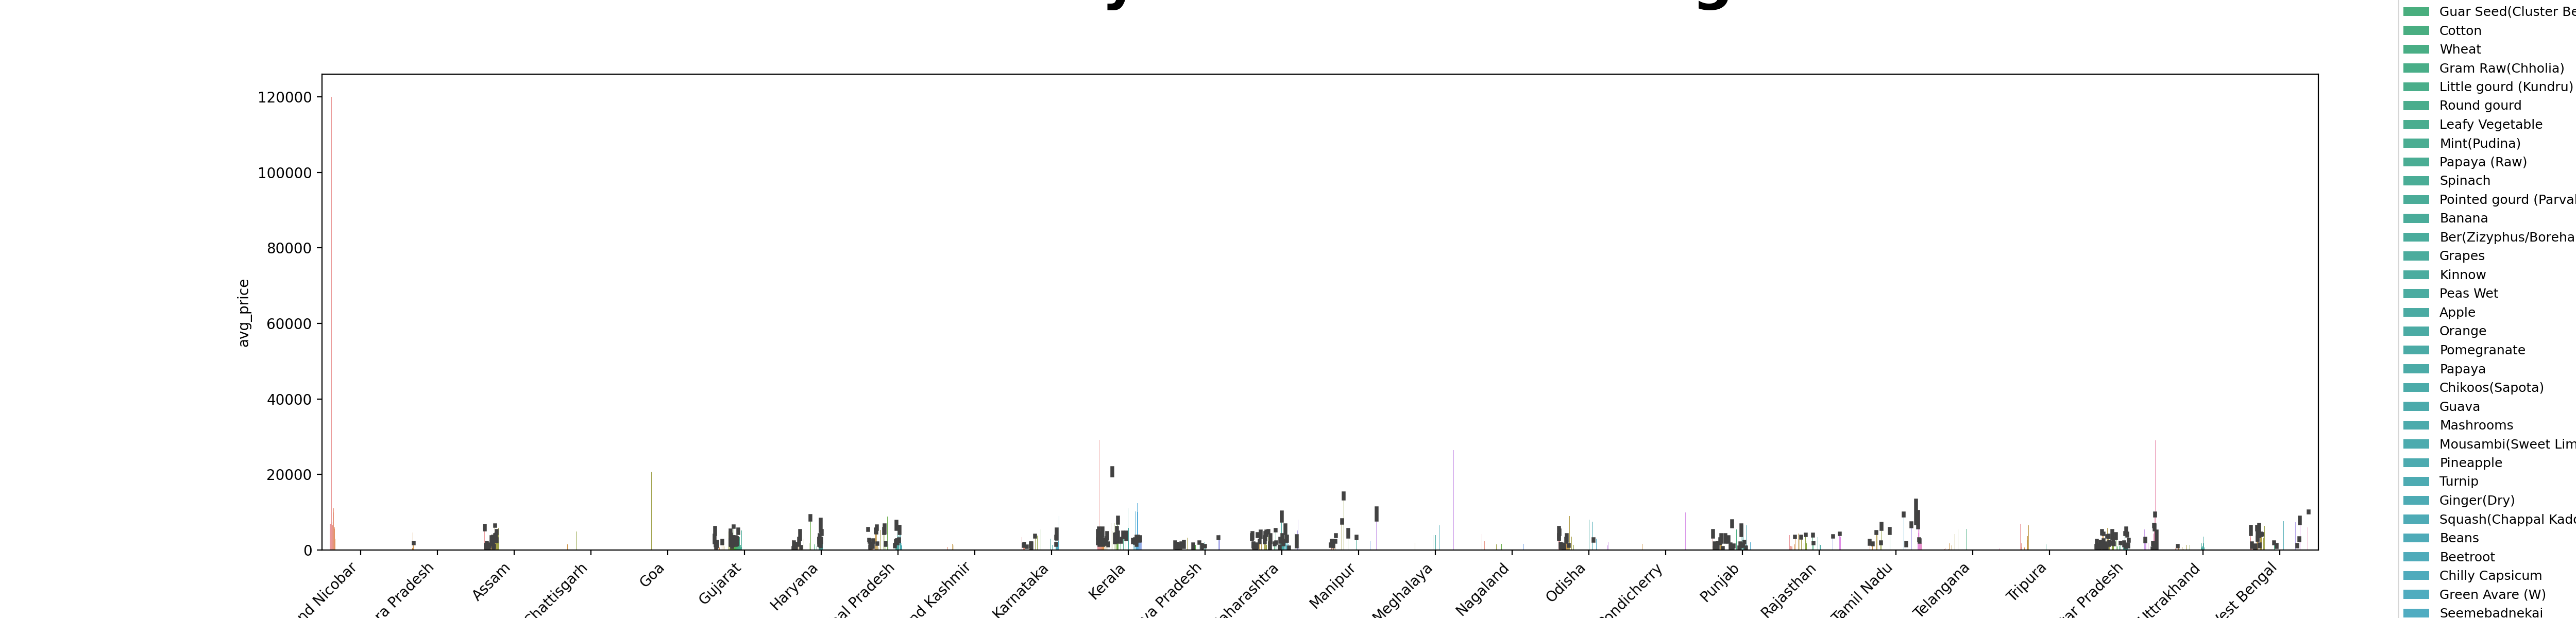

In [60]:
fig, ax = plt.subplots(figsize=(25, 6))
sns.barplot(x='state', y='avg_price', hue='commodity', data=commodity_prices, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.legend(title='commodity', bbox_to_anchor=(1.04, 0.5), loc='center left', borderaxespad=0, fontsize=9)
plt.title('"Commodity Prices Across Regions"\n',
          fontsize=40,
          fontweight = "bold")
plt.show()

## Commodity Analysis
1. Analyze the pricing patterns of different commodities.

2. Identify commodities with the highest and lowest prices based on modal price.

3. Determine the average price range for each commodity.

Commodity    Commodity B
avg_price             15
Name: 1, dtype: object
Commodity    Commodity C
avg_price              8
Name: 2, dtype: object


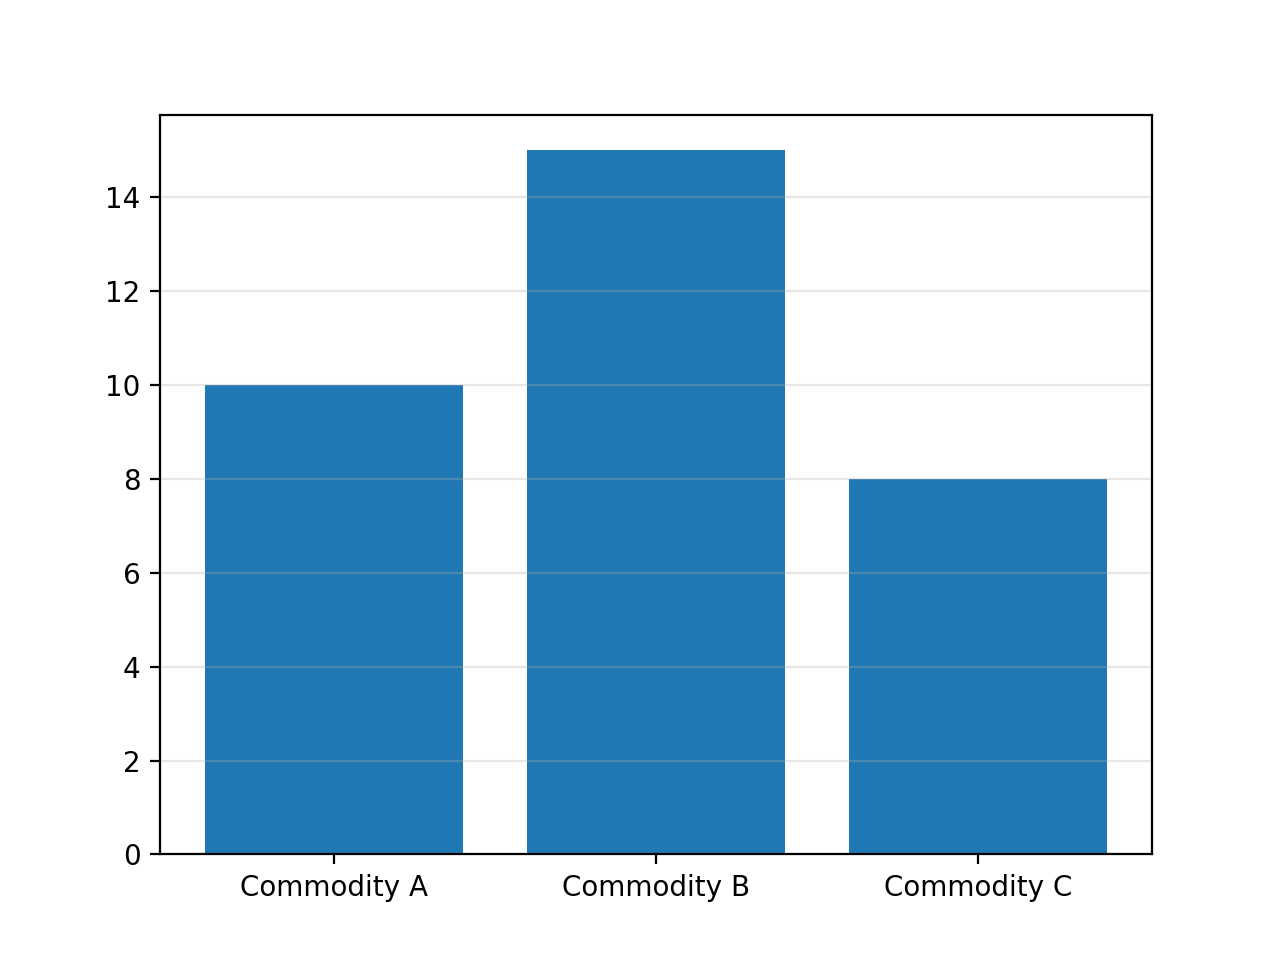

In [61]:
# Example data for commodity patterns
df_demo = { 'Commodity' : ["Commodity A", "Commodity B", "Commodity C"] ,
              'avg_price' : [10, 15, 8] }
df = pd.DataFrame(df_demo)

# Identify commodities with the highest and lowest prices
highest_price = df.loc[df['avg_price'].idxmax()]
lowest_price = df.loc[df['avg_price'].idxmin()]

print(highest_price)
print(lowest_price)

# Horizontal Bar Plot
plt.bar(df['Commodity'], df['avg_price'])
plt.grid(True, axis='y', alpha= 0.3)
# Show Plot
plt.show()


## Time Analysis
1. Analyze the dataset based on the "arrival_date" column.

2. Identify any seasonal trends or patterns in commodity prices.

3. Visualize the time series data to understand the price fluctuations over time.

In [62]:
# Extract year from date
data.head(5)

state       district      market              commodity  \
0  Andaman and Nicobar  South Andaman  Port Blair             Amaranthus   
1  Andaman and Nicobar  South Andaman  Port Blair         Banana - Green   
2  Andaman and Nicobar  South Andaman  Port Blair  Bhindi(Ladies Finger)   
3  Andaman and Nicobar  South Andaman  Port Blair           Bitter gourd   
4  Andaman and Nicobar  South Andaman  Port Blair           Black pepper   

          variety arrival_date  min_price  max_price  modal_price  
0      Amaranthus   2019-04-03       6000       8000         7000  
1  Banana - Green   2019-04-03       4500       5500         5000  
2          Bhindi   2019-04-03       6000       8000         7000  
3           Other   2019-04-03       6000       8000         7000  
4           Other   2019-04-03     110000     130000       120000

In [63]:
data["arrival_date"].dt.year

0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
2233    2019
2234    2019
2235    2019
2236    2019
2237    2019
Name: arrival_date, Length: 2236, dtype: int64

In [64]:
data = data.assign(year=data["arrival_date"].dt.year)

In [65]:
# Analyze seasonal trends or patterns in commodity prices
data.head(5)

state       district      market              commodity  \
0  Andaman and Nicobar  South Andaman  Port Blair             Amaranthus   
1  Andaman and Nicobar  South Andaman  Port Blair         Banana - Green   
2  Andaman and Nicobar  South Andaman  Port Blair  Bhindi(Ladies Finger)   
3  Andaman and Nicobar  South Andaman  Port Blair           Bitter gourd   
4  Andaman and Nicobar  South Andaman  Port Blair           Black pepper   

          variety arrival_date  min_price  max_price  modal_price  year  
0      Amaranthus   2019-04-03       6000       8000         7000  2019  
1  Banana - Green   2019-04-03       4500       5500         5000  2019  
2          Bhindi   2019-04-03       6000       8000         7000  2019  
3           Other   2019-04-03       6000       8000         7000  2019  
4           Other   2019-04-03     110000     130000       120000  2019

In [66]:
commodity_seasonality = data.groupby(['year', 
                                      'commodity']).agg(avg_price=('modal_price', 
                                                                   'mean')).reset_index()


In [67]:
commodity_seasonality.head(10)

year                    commodity     avg_price
0  2019                   Amaranthus   2916.666667
1  2019              Amla(Nelli Kai)   3800.000000
2  2019                  Amphophalus   2450.000000
3  2019                        Apple   5722.968750
4  2019    Arecanut(Betelnut/Supari)  15827.777778
5  2019  Arhar (Tur/Red Gram)(Whole)   5072.500000
6  2019           Arhar Dal(Tur Dal)   6435.714286
7  2019                     Ashgourd   1931.818182
8  2019    Bajra(Pearl Millet/Cumbu)   1771.062500
9  2019                       Banana   2543.581081

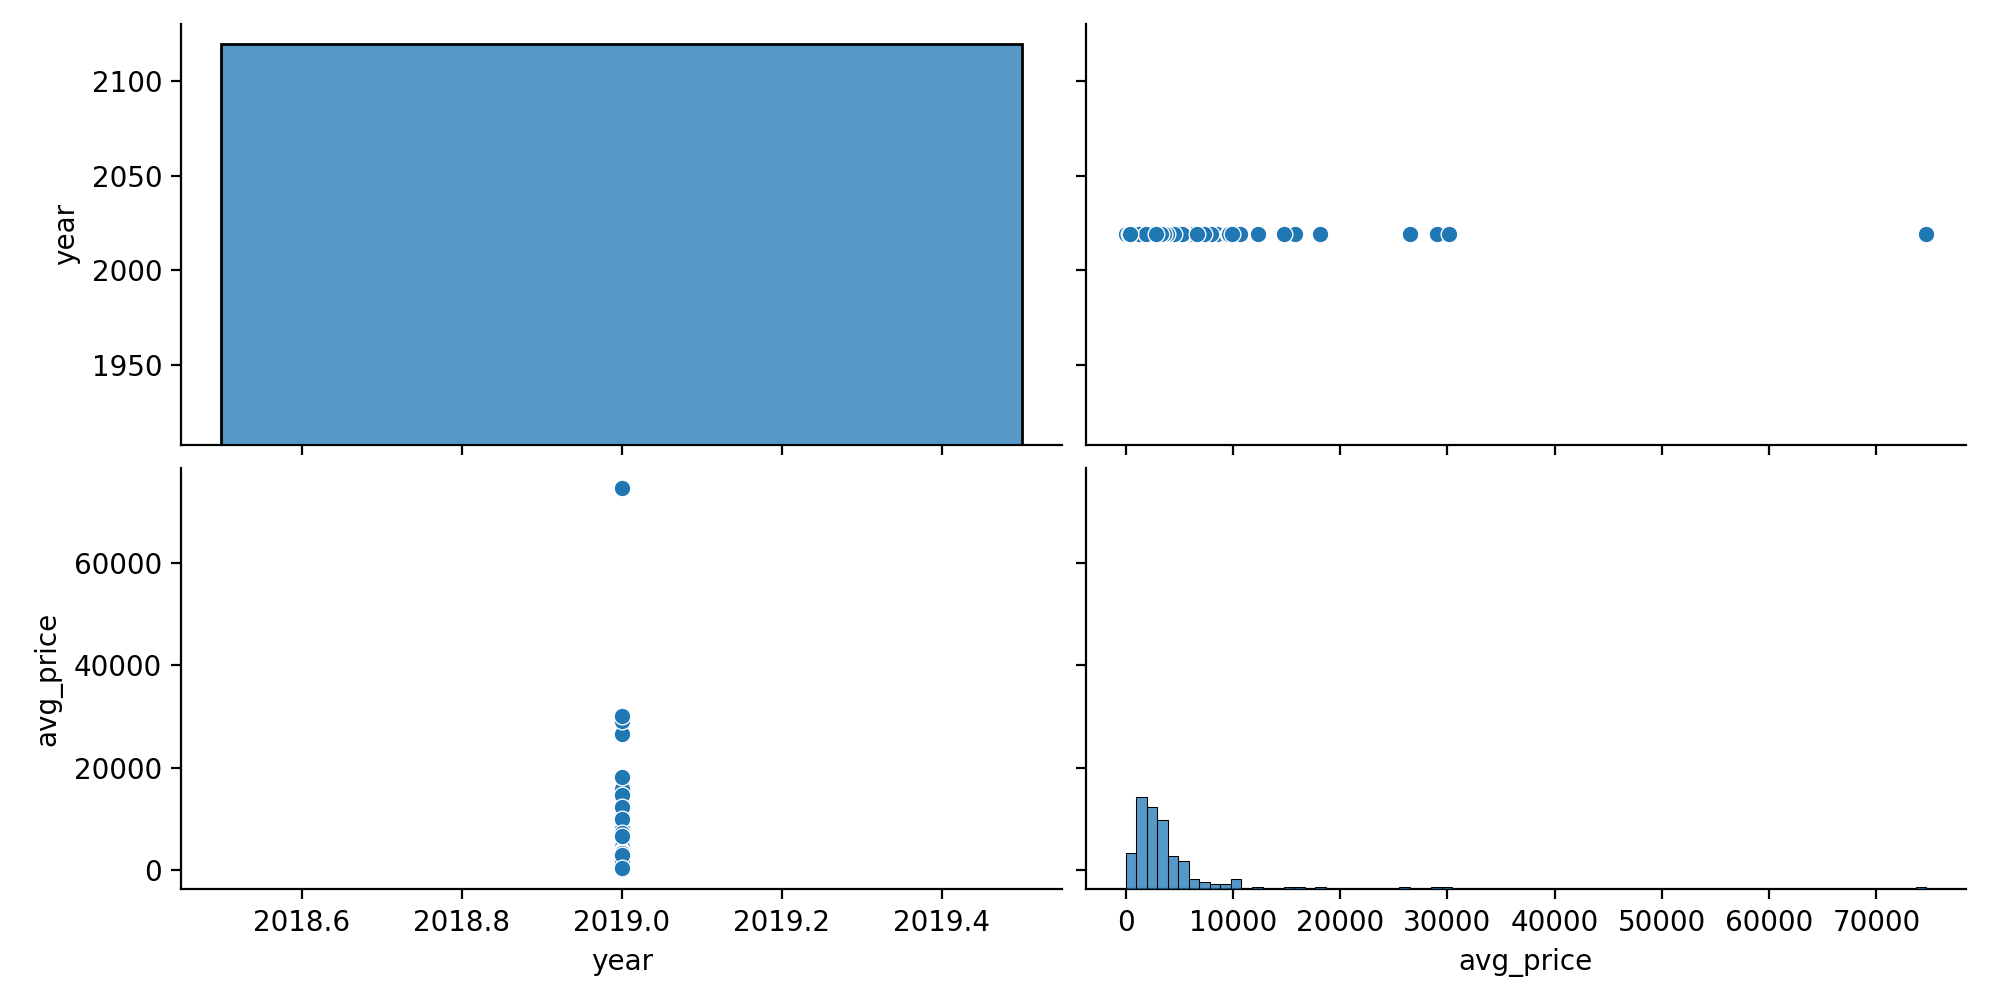

In [68]:
#create pairs plot for all numeric variables
sns.pairplot(commodity_seasonality, aspect = 2)

plt.show()

## Apply the Advance Statistic are the following:

## 1. Q-Q Plot:

#### Q-Q Plot (Quantile-Quantile Plot):
A Q-Q plot is a graphical tool used to assess if a given dataset follows a specific theoretical distribution. It compares the quantiles of the dataset against the quantiles of the expected distribution. If the points in the plot fall approximately on a straight line, it suggests that the data follows the expected distribution.

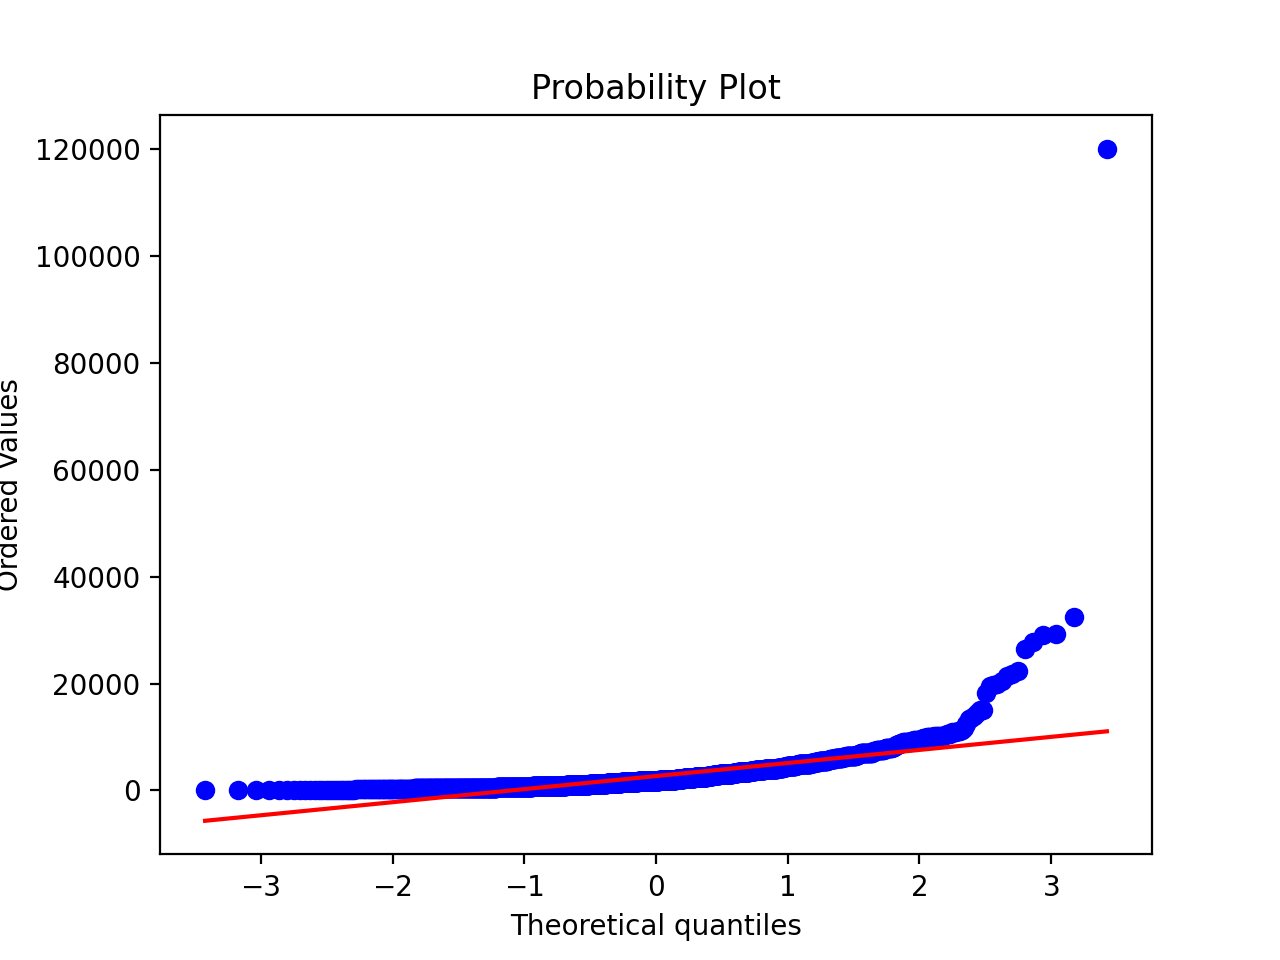

In [69]:
# Perform Q-Q plot for 'modal_price'

import numpy as np 
import pylab 
import scipy.stats as stats
# measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(data['modal_price'], dist="norm", plot=pylab)
pylab.show()

## 2. Chebyshev's inequality:

#### Chebyshev's Inequality:
Chebyshev's inequality is a probabilistic inequality that provides bounds on the probability that a random variable deviates from its mean. It states that for any random variable, the probability that the variable differs from its mean by more than k standard deviations is at most 1/k^2. It is a useful tool for understanding the spread of data and making probabilistic statements.

In [70]:
# Calculate Chebyshev's inequality for 'modal_price'
from statistics import stdev
mean = data['modal_price'].mean()
sd = stdev(data['modal_price'])

k = 2 # Choose the number of standard deviations

lower_bound = mean - 2 * sd
upper_bound = mean + 2 * sd
prop_outliers = sum((data['modal_price'] < lower_bound) | (data['modal_price'] > upper_bound)) / len(data['modal_price'])
'''
    The sum((data['modal_price'] < lower_bound) | (data['modal_price'] > upper_bound)) part of 
    the code identifies the number of outliers in the dataset. 
    The len(data['modal_price']) part of the code calculates the total 
    number of observations in the dataset. Finally, dividing the number of outliers by 
    the total number of observations gives us the proportion of outliers in the dataset 
'''
# Calculate Chebyshev's inequality for 'modal_price'
prop_outliers

0.01744186046511628

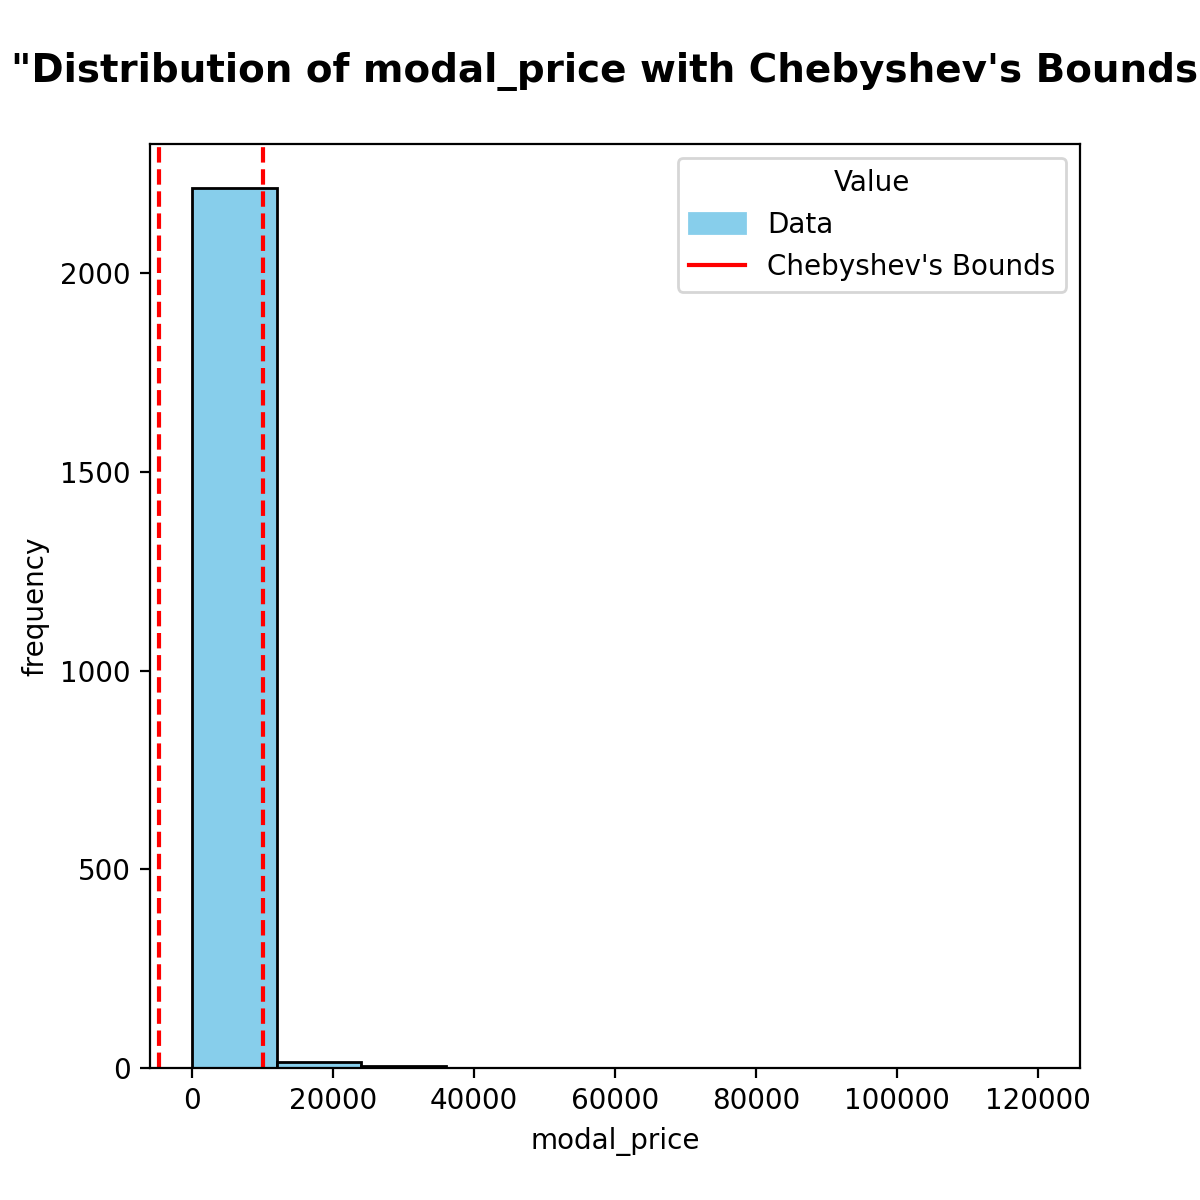

In [71]:
# Plot the distribution of 'modal_price' with Chebyshev's bounds
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

# Creating histogram
fig, ax = plt.subplots(figsize =(6, 6))
ax.hist(data['modal_price'], color = "skyblue", edgecolor = "black")
plt.axvline(x = lower_bound, linestyle ="--", color ='red')
plt.axvline(x = upper_bound, linestyle ="--", color ='red')

plt.title('"Distribution of modal_price with Chebyshev\'s Bounds"\n',
          fontsize=14,
          fontweight = "bold")
plt.xlabel("modal_price")
plt.ylabel("frequency")
patch = mpatches.Patch(color='skyblue', label='Data')
dash_line =  mlines.Line2D([], [], color='red', markersize=15, label="Chebyshev's Bounds")
ax.legend(title='Value', handles=[patch, dash_line], loc='upper right' )

# Show plot
plt.show()

## 3. Discrete and continuous distribution:

### Discrete and Continuous Distribution: 
Discrete distribution refers to a probability distribution where the random variable can only take on specific, distinct values. Examples include the binomial distribution and Poisson distribution. Continuous distribution refers to a probability distribution where the random variable can take on any value within a range. Examples include the normal distribution and exponential distribution.

In [72]:
# Discrete distribution of 'state'
import random 
state = data['state']
print(state.value_counts())
#print(random.choices(state, k=10))

Uttar Pradesh          574
Kerala                 274
Tamil Nadu             183
Punjab                 180
West Bengal            162
Maharashtra            162
Gujarat                113
Himachal Pradesh       102
Odisha                  84
Haryana                 65
Assam                   58
Manipur                 52
Madhya Pradesh          44
Rajasthan               41
Karnataka               36
Uttrakhand              21
Tripura                 18
Telangana               15
Andaman and Nicobar     15
Andhra Pradesh           7
Pondicherry              7
Meghalaya                6
Nagaland                 6
Chattisgarh              5
Jammu and Kashmir        3
Goa                      3
Name: state, dtype: int64


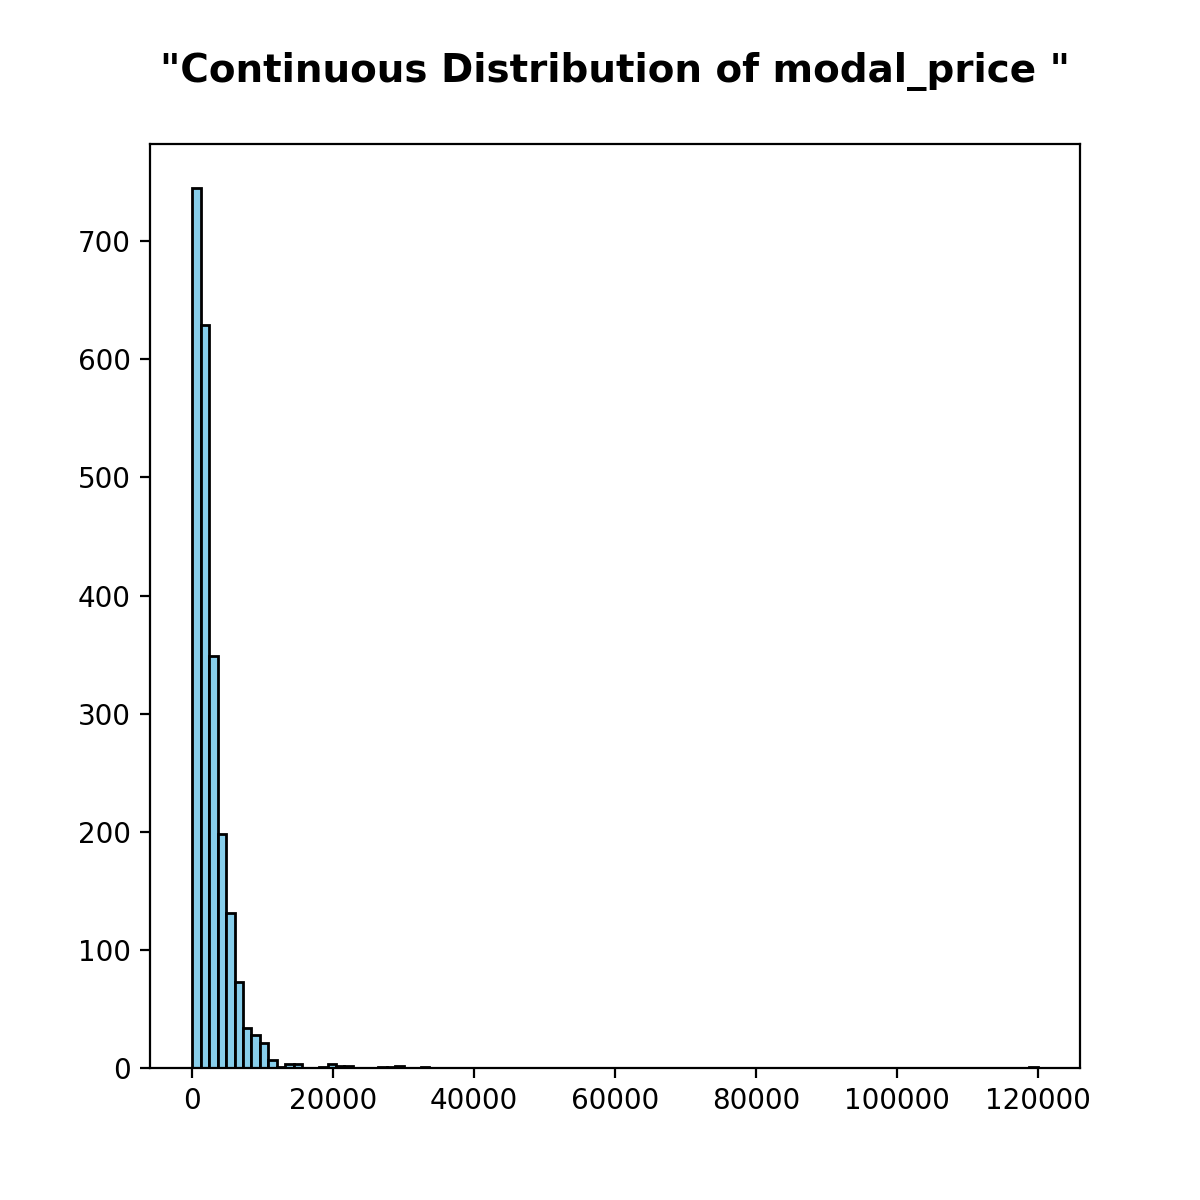

In [73]:
# Continuous distribution of 'modal_price'
model_price = data['modal_price']
fig, ax = plt.subplots(figsize =(6, 6))
ax.hist(data['modal_price'], bins= 100,color = "skyblue", edgecolor = "black")
plt.title('"Continuous Distribution of modal_price "\n',
          fontsize=14,
          fontweight = "bold")
# Show plot
plt.show()

## 4. Bernoulli and binomial distribution:

#### Bernoulli and Binomial Distribution:
The Bernoulli distribution represents a binary random variable that can take two possible outcomes (usually labeled as success and failure) with a fixed probability of success. The binomial distribution is an extension of the Bernoulli distribution, representing the number of successes in a fixed number of independent Bernoulli trials.

In [74]:
# Bernoulli distribution for 'state' with success being "Andaman and Nicobar"

p_success = sum(data['state']== "Andaman and Nicobar")/ len(data['state'])
p_success

0.006708407871198569

 mean =  0.06708407871198568 
 variance =  0.0666340513503221


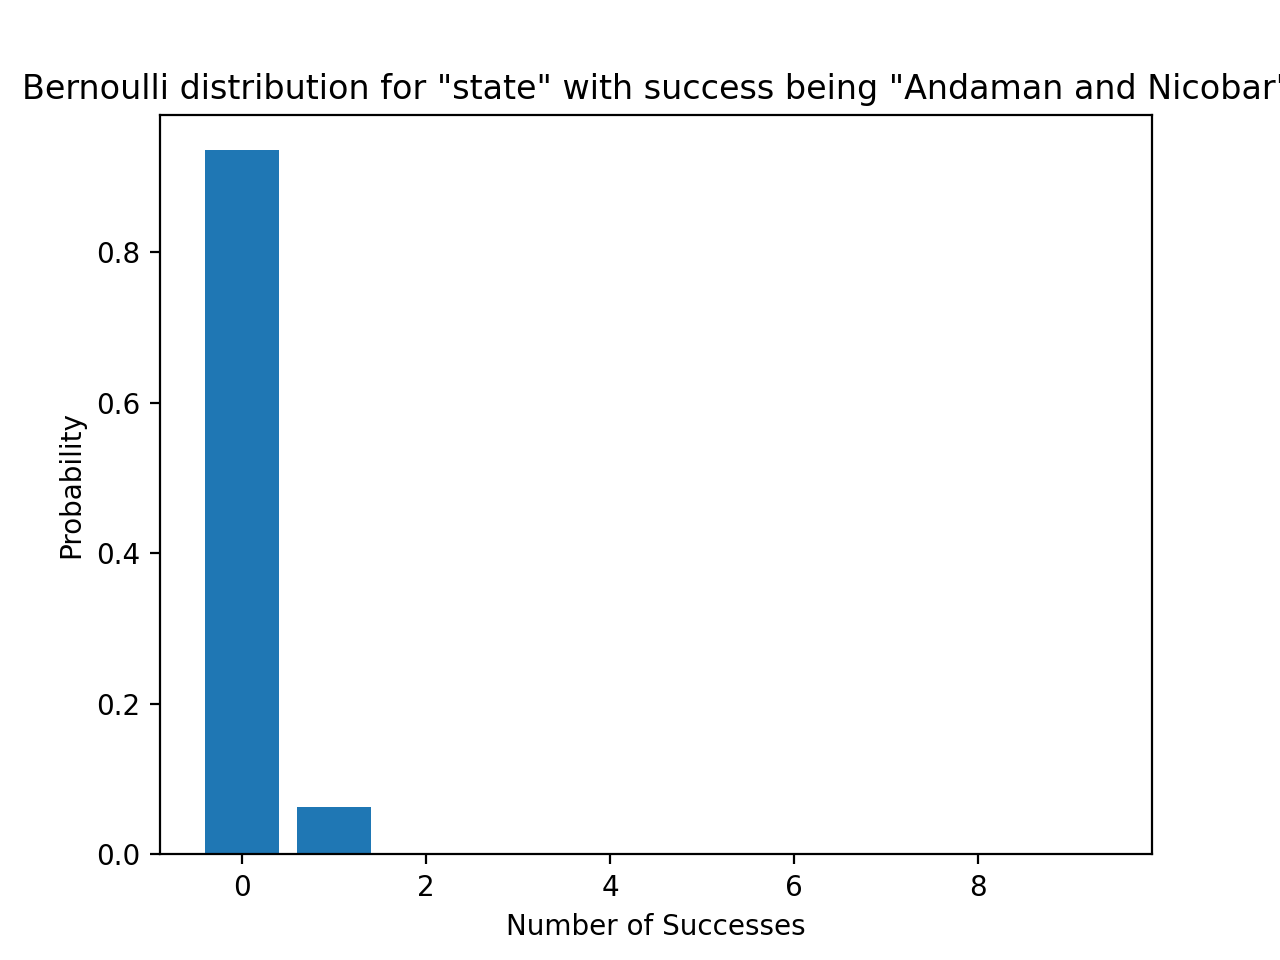

In [75]:
# Binomial distribution for 'state' with "Andaman and Nicobar" as the success and n = 10 trials
from scipy.stats import binom

n_trials = 10
x = list(range(n_trials))

# obtaining the mean and variance 
mean, var = binom.stats(n_trials, p_success)
print(' mean = ', mean, '\n', 'variance = ', var)

# list of pmf values
probabilities = [binom.pmf(r, n_trials, p_success) for r in x ]
# plotting the graph 
plt.bar(x, probabilities)

plt.xlabel("Number of Successes")
plt.ylabel("Probability")
plt.title('Bernoulli distribution for "state" with success being "Andaman and Nicobar"')
plt.show()


## 5. Log-normal distribution:

#### Log-Normal Distribution: 
The log-normal distribution is a continuous probability distribution where the logarithm of the random variable follows a normal distribution. It is often used to model variables that are naturally positive and skewed, such as financial returns and particle sizes.

In [76]:
# Fit log-normal distribution to 'modal_price'

from scipy.stats import lognorm
import numpy as np

df = np.array(data['modal_price']) # replace with your own data
s, loc, scale = lognorm.fit(df)

print(s) # shape parameter
print(loc) # location parameter
print(scale) # scale parameter


0.8092396954977409
-186.46013271193615
2047.841213435353


In [77]:
from scipy.stats import lognorm
import numpy as np

df = np.array(data['modal_price']) # replace with your own data
s, loc, scale = lognorm.fit(df)

mean_log = np.log(scale)
sd_log = s
mean_price = np.exp(mean_log + 0.5 * sd_log**2)
sd_price = np.sqrt((np.exp(sd_log**2) - 1) * np.exp(2 * mean_log + sd_log**2))

print(mean_price)
print(sd_price)


2841.183282179248
2732.400274512273


In [78]:
# Generate x-axis values for the plot
from scipy.stats import lognorm
import numpy as np

x = np.linspace(np.min(df), np.max(df), num=100)
# Calculate the corresponding log-normal probability density function (pdf)
pdf = lognorm.pdf(x, s=sd_log, loc=0, scale=np.exp(mean_log))

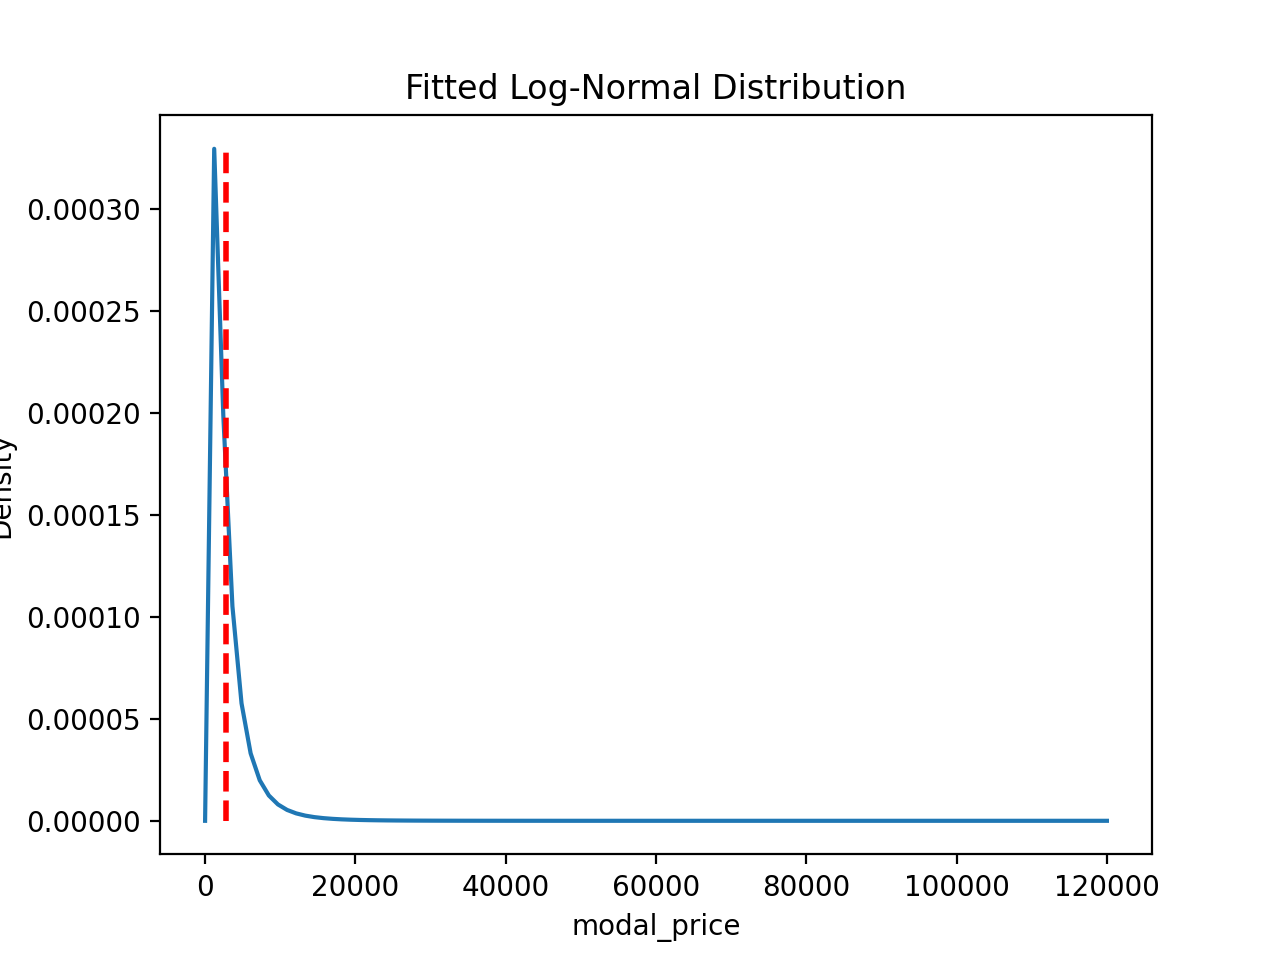

In [79]:
plt.plot(x, pdf)

#Add a vertical line for the mean price
plt.vlines(x=mean_price, ymin=0, ymax= max(pdf),
           colors='r', ls='--', 
           lw=2, 
           label='vline_multiple - full height')

plt.xlabel("modal_price")
plt.ylabel("Density")
plt.title("Fitted Log-Normal Distribution")

plt.show()

## 6. Power law distribution:

#### Power Law Distribution: 
Power law distribution refers to a functional relationship between two quantities, where one quantity is a power of the other. It represents a specific type of heavy-tailed distribution, where the probability of extreme events is relatively high compared to other distributions. Power law distributions are observed in various phenomena, such as the distribution of city populations and the frequency of words in natural language.

In [80]:
# Perform power law distribution analysis on 'modal_price'
import powerlaw
fit = powerlaw.Fit(data["modal_price"])

#Calculating best minimal value for power law fit
print("power_law.alpha =", fit.power_law.alpha)
print("power_law.sigma= ", fit.power_law.sigma)
print('distribution_comparefit = ', fit.distribution_compare('power_law', 'exponential'))

Calculating best minimal value for power law fit
power_law.alpha = 3.578162388300523
power_law.sigma=  0.1434527926411877
distribution_comparefit =  (43.899109570392504, 0.09948470077903479)


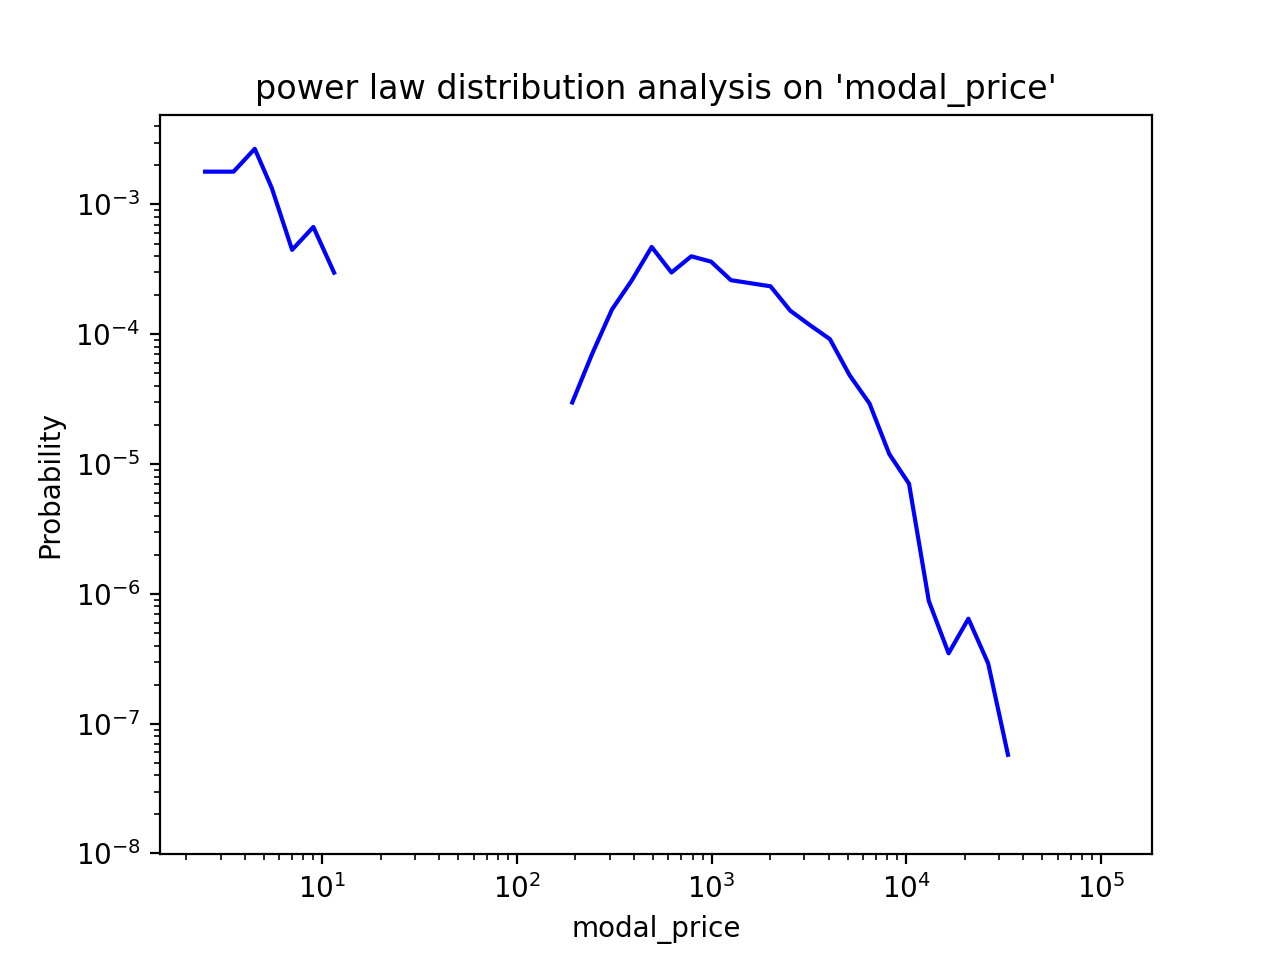

In [81]:
powerlaw.plot_pdf(data['modal_price'], color='b')
plt.xlabel("modal_price")
plt.ylabel("Probability")
plt.title("power law distribution analysis on 'modal_price'")
plt.show()

Calculating best minimal value for power law fit


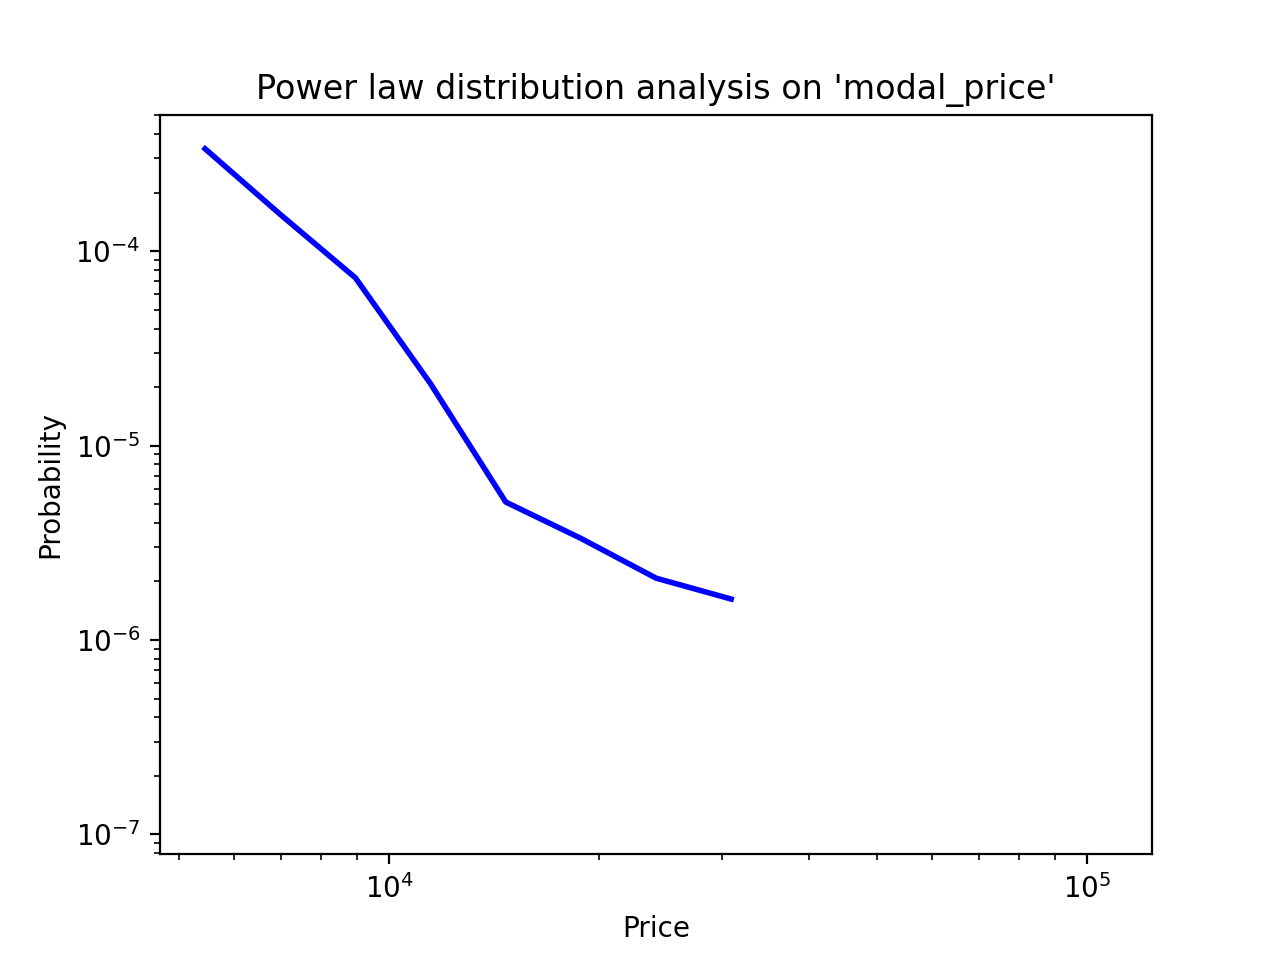

In [82]:
from powerlaw import plot_pdf, Fit, pdf
import matplotlib.pyplot as plt

data_pl = Fit(data['modal_price'])
fig = data_pl.plot_pdf(color='b', linewidth=2)
plt.xlabel("Price")
plt.ylabel("Probability")
plt.title("Power law distribution analysis on 'modal_price'")

plt.show()

## 7. Box-Cox Transform:
#### Box-Cox Transform:
The Box-Cox transform is a technique used to stabilize the variance and/or improve the normality of a dataset. It applies a power transformation to the data to achieve these objectives. The optimal power parameter is determined through maximum likelihood estimation.

C:\Users\ajitw\AppData\Local\Temp\ipykernel_6960\2988481126.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

C:\Users\ajitw\AppData\Local\Temp\ipykernel_6960\2988481126.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



Lambda value used for Transformation: 0.21687562071016647


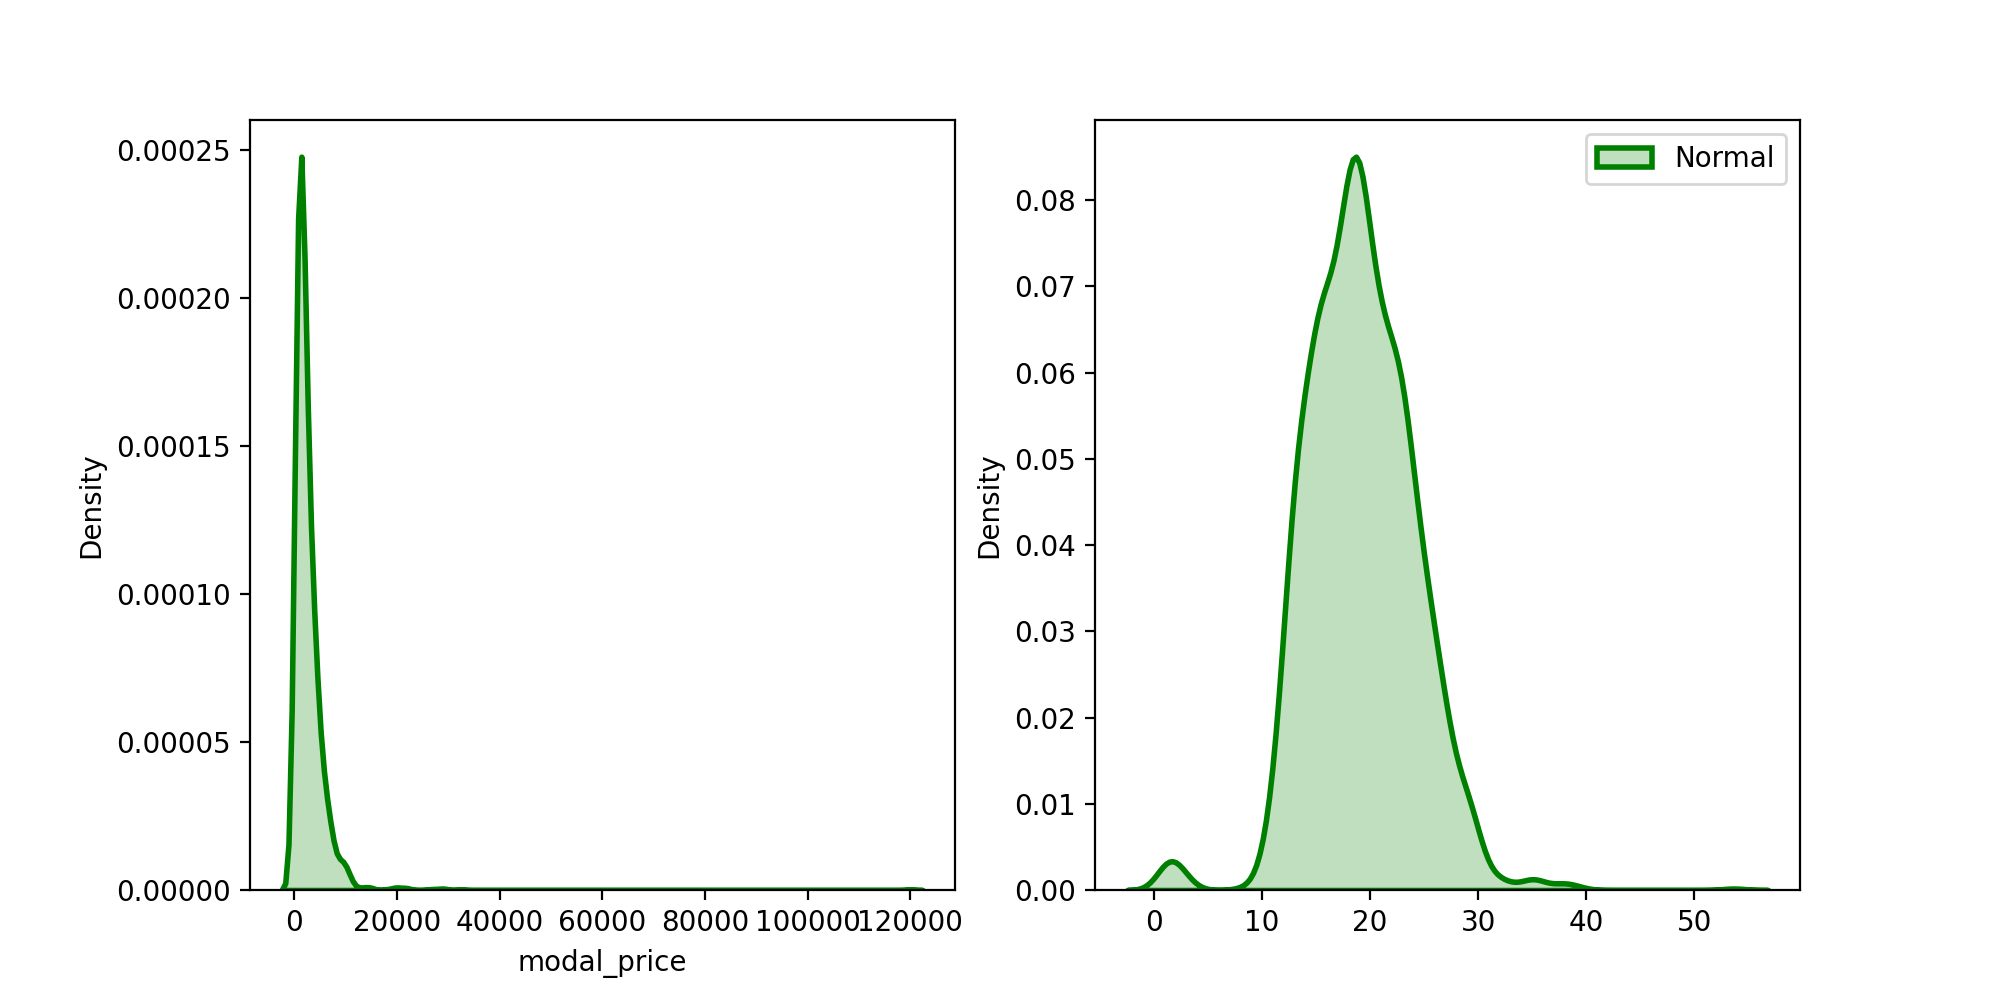

In [83]:
# Perform Box-Cox transform on 'modal_price'
original_data = data['modal_price']

# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(original_data)

# creating axes to draw plots
fig, ax = plt.subplots(1, 2)

# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(original_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])

sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])

# adding legends to the subplots
plt.legend(loc = "upper right")

# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

print(f"Lambda value used for Transformation: {fitted_lambda}")

## 8. Poisson distribution:

#### Poisson Distribution:
The Poisson distribution is a discrete probability distribution that models the number of events occurring in a fixed interval of time or space when the events occur with a known average rate and independently of the time since the last event. It is commonly used to model rare events such as the number of phone calls received per hour or the number of accidents in a day.

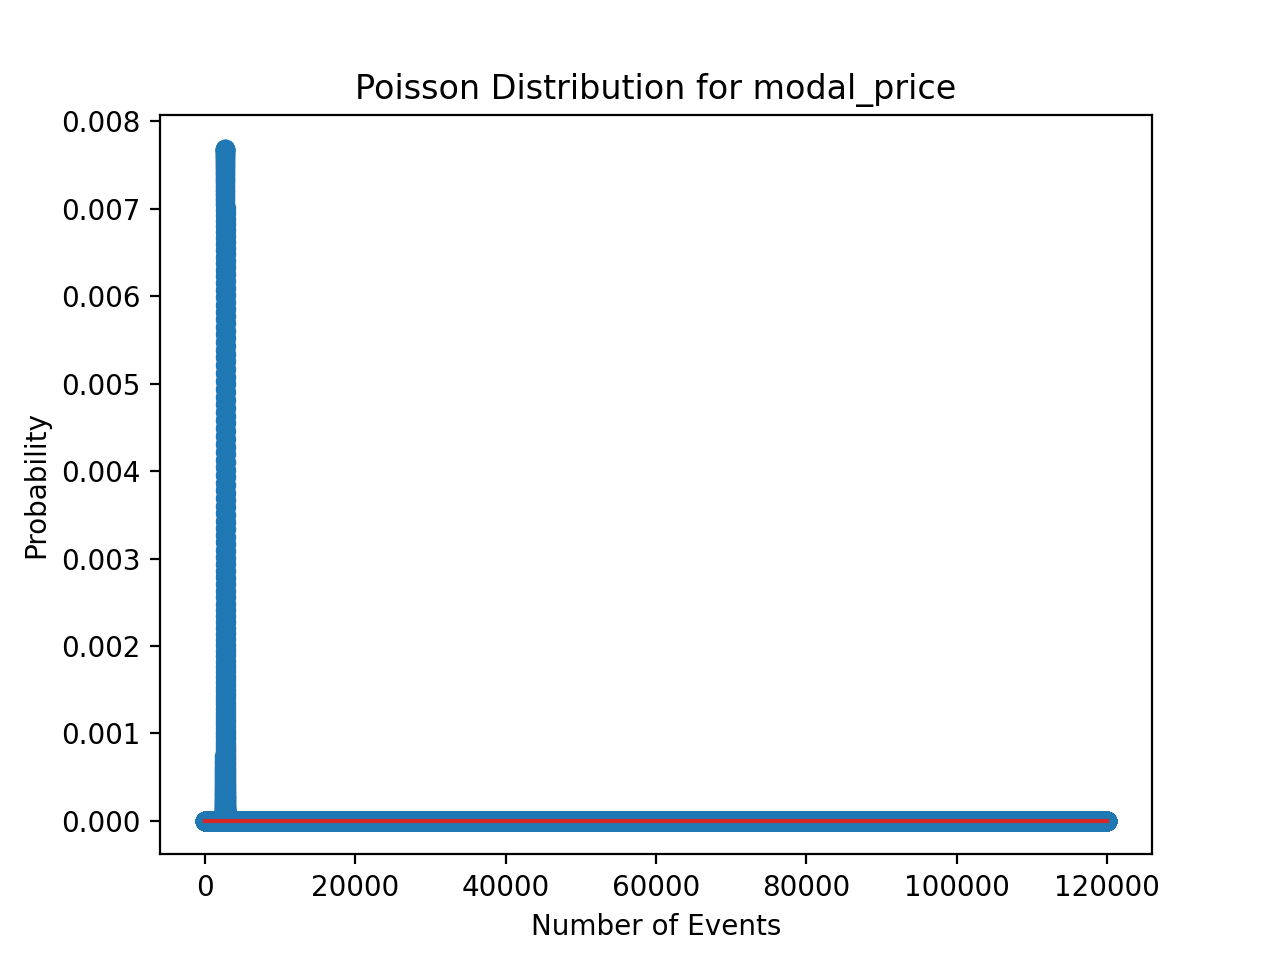

Mean: 2694.1243291592127 

Value(s) of x with Maximum Probability: 2694 



In [84]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

lambda_ = np.mean(data['modal_price'])
x = np.arange(0, np.max(data['modal_price']) + 1)
probabilities = poisson.pmf(x, lambda_)
plt.stem(x, probabilities)
plt.title("Poisson Distribution for modal_price")
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.show()

# Calculate the maximum probability
max_prob = max(probabilities)

# Find the corresponding value(s) of x with maximum probability
x_max_prob = x[np.argmax(probabilities)]

# Print the mean and the x value(s) with the maximum probability
print("Mean:", lambda_, "\n")
print("Value(s) of x with Maximum Probability:", x_max_prob, "\n")

## 9. Non-Gaussian distribution and z-test:

#### Non-Gaussian Distribution and Z-test: 
Non-Gaussian distribution refers to any probability distribution that is not Gaussian (normal). Non-Gaussian distributions may have different shapes, skewness, or heavier tails compared to the normal distribution. The Z-test is a statistical test that is applicable when the data follows a Gaussian distribution. It compares a sample mean to a known population mean and determines if there is a significant difference.

In [85]:
# Perform Shapiro-Wilk test for normality

from scipy.stats import shapiro
test_statistic, p_value = shapiro(data['modal_price'])
print(test_statistic, p_value)

''' In this code, we use the shapiro function from
    the scipy.stats module to perform the Shapiro-Wilk test for
    normality on the modal_price column of the data DataFrame. 
    The result of the test is stored in the shapiro_test variable.
'''

0.4413578510284424 0.0


' In this code, we use the shapiro function from\n    the scipy.stats module to perform the Shapiro-Wilk test for\n    normality on the modal_price column of the data DataFrame. \n    The result of the test is stored in the shapiro_test variable.\n'

In [86]:
# import useful library
import numpy as np
from scipy.stats import shapiro
from numpy.random import randn

# Create data
gfg_data = data['modal_price']

# conduct the Shapiro-Wilk Test
shapiro(gfg_data)


ShapiroResult(statistic=0.4413578510284424, pvalue=0.0)

In [87]:
import numpy as np
from scipy.stats import norm

mean_price = np.mean(data['modal_price'])
z = (np.mean(data['modal_price']) - mean_price) / (np.std(data['modal_price']) / np.sqrt(len(data['modal_price'])))
p_value = 2 * (1 - norm.cdf(abs(z)))
print(z, p_value)

0.0 1.0


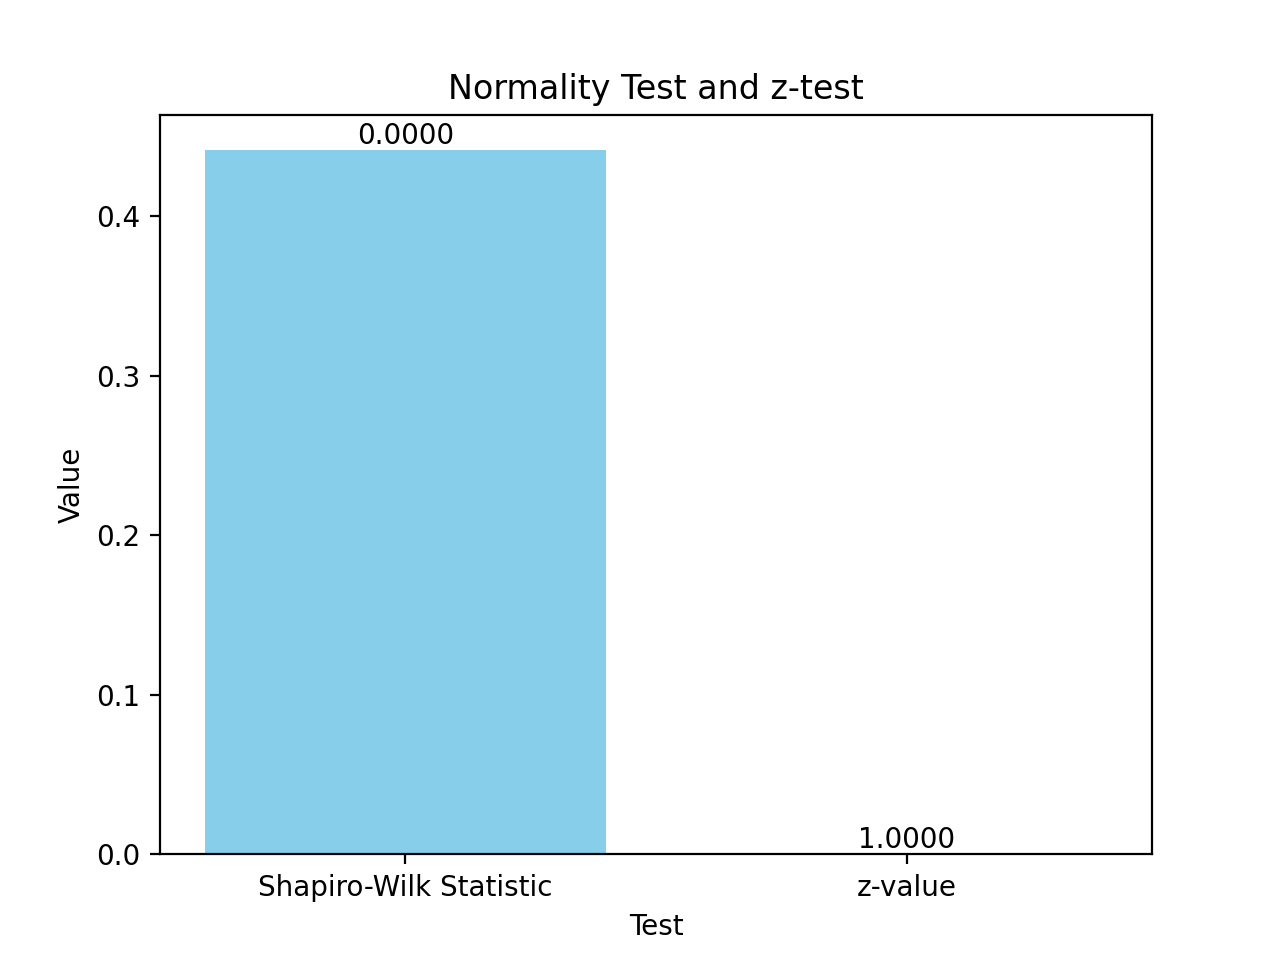

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, norm

# Perform Shapiro-Wilk test for normality
shapiro_result = shapiro(data['modal_price'])

# Perform z-test comparing 'modal_price' to a normal distribution
mean_price = np.mean(data['modal_price'])
z = (np.mean(data['modal_price']) - mean_price) / (np.std(data['modal_price']) / np.sqrt(len(data['modal_price'])))
p_value = 2 * (1 - norm.cdf(abs(z)))

# Create a bar plot to visualize the results
plot_results = [shapiro_result[0], abs(z)]
test_names = ["Shapiro-Wilk Statistic", "z-value"]

plt.bar(test_names, plot_results, color=["skyblue", "pink"])
plt.title("Normality Test and z-test")
plt.xlabel("Test")
plt.ylabel("Value")

# Add text for the p-values
for i, value in enumerate(plot_results):
    plt.text(i, value, "{:.4f}".format([shapiro_result[1], p_value][i]), ha="center", va="bottom")

plt.show()


## 10. T-test:
#### T-test:
The t-test is a statistical test used to determine if there is a significant difference between the means of two groups. It is applicable when the data follows a Gaussian distribution and is commonly used in hypothesis testing to compare means, such as in A/B testing or comparing treatment groups.

In [89]:
import scipy.stats as stats

state1 = "Andaman and Nicobar"
state2 = "West Bengal"
group1 = data['modal_price'][data['state'] == state1]
group2 = data['modal_price'][data['state'] == state2]
# Conduct Welch's t-Test and print the result
t_test = stats.ttest_ind(group1, group2, equal_var = False)
print(t_test)

'''
    In this code, we use the ttest_ind function from the scipy.stats module
    to perform a two-sample t-test on the modal_price column of the data 
    DataFrame for the two states specified by the state1 and state2 variables.
    The result of the test is stored in the t_test variable.
'''

Ttest_indResult(statistic=1.4735143930605858, pvalue=0.16271500215752532)


'\n    In this code, we use the ttest_ind function from the scipy.stats module\n    to perform a two-sample t-test on the modal_price column of the data \n    DataFrame for the two states specified by the state1 and state2 variables.\n    The result of the test is stored in the t_test variable.\n'

Alternative hypothesis: true difference in means is not equal to 0

95 percent confidence interval:

                   -5094.999 27470.554
 
sample estimates:

                    mean of x   mean of y 
                    
                    14073.333   2885.556 

T-test p-value: 0.16271500215752532


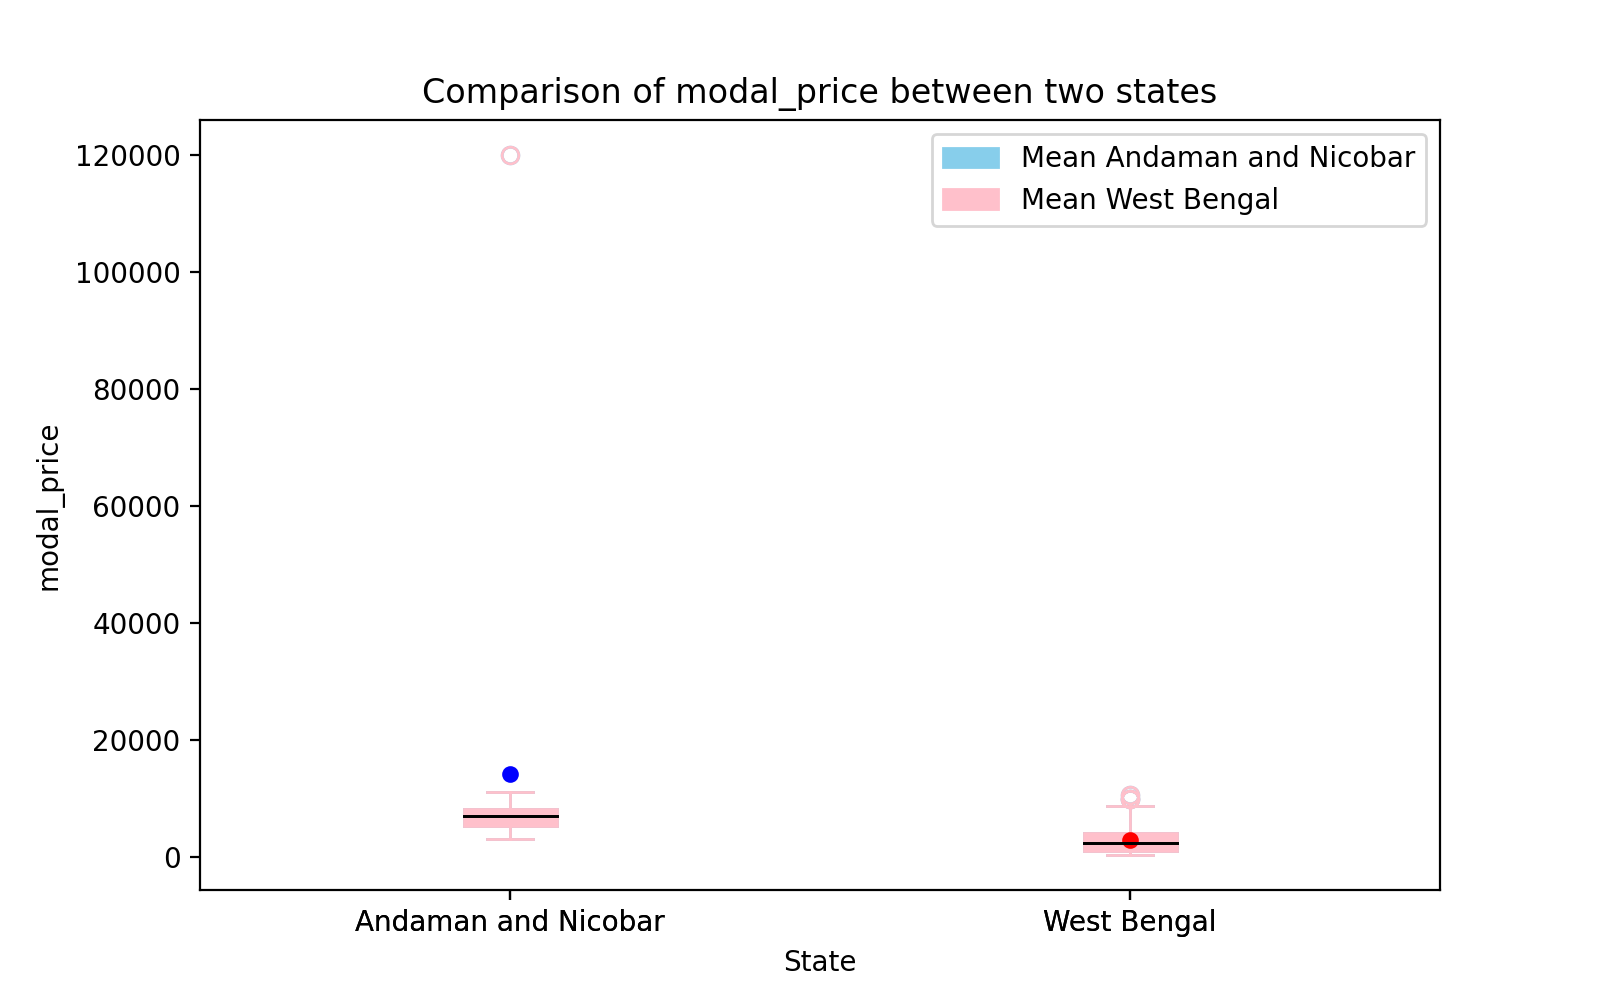

In [90]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize =(8, 5))
# Create a box plot to compare the two groups
plt.boxplot([group1, group2], labels=[state1, state2], patch_artist=True,
            boxprops=dict(facecolor="skyblue", color="skyblue"),
            whiskerprops=dict(color="skyblue"),
            capprops=dict(color="skyblue"),
            medianprops=dict(color="black"),
            flierprops=dict(markeredgecolor="skyblue"))

plt.boxplot([group1, group2], labels=[state1, state2], patch_artist=True,
            boxprops=dict(facecolor="pink", color="pink"),
            whiskerprops=dict(color="pink"),
            capprops=dict(color="pink"),
            medianprops=dict(color="black"),
            flierprops=dict(markeredgecolor="pink"))

plt.xlabel("State")
plt.ylabel("modal_price")
plt.title("Comparison of modal_price between two states")

# Add mean values as points
plt.plot(1, np.mean(group1), marker="o", markersize=5, color="blue")
plt.plot(2, np.mean(group2), marker="o", markersize=5, color="red")

# Add a legend
import matplotlib.patches as mpatches
skyblue_patch = mpatches.Patch(color='skyblue', label= "Mean " + state1)
pink_patch = mpatches.Patch(color='pink', label= "Mean " + state2)


# plt.legend(["Mean " + state1, "Mean " + state2], loc="upper right")  #####

plt.legend(handles=[skyblue_patch, pink_patch], loc="upper right" )

# Print the t-test result
print("T-test p-value:", t_test[1])

plt.show()


T-test p-value: 0.16271500215752532


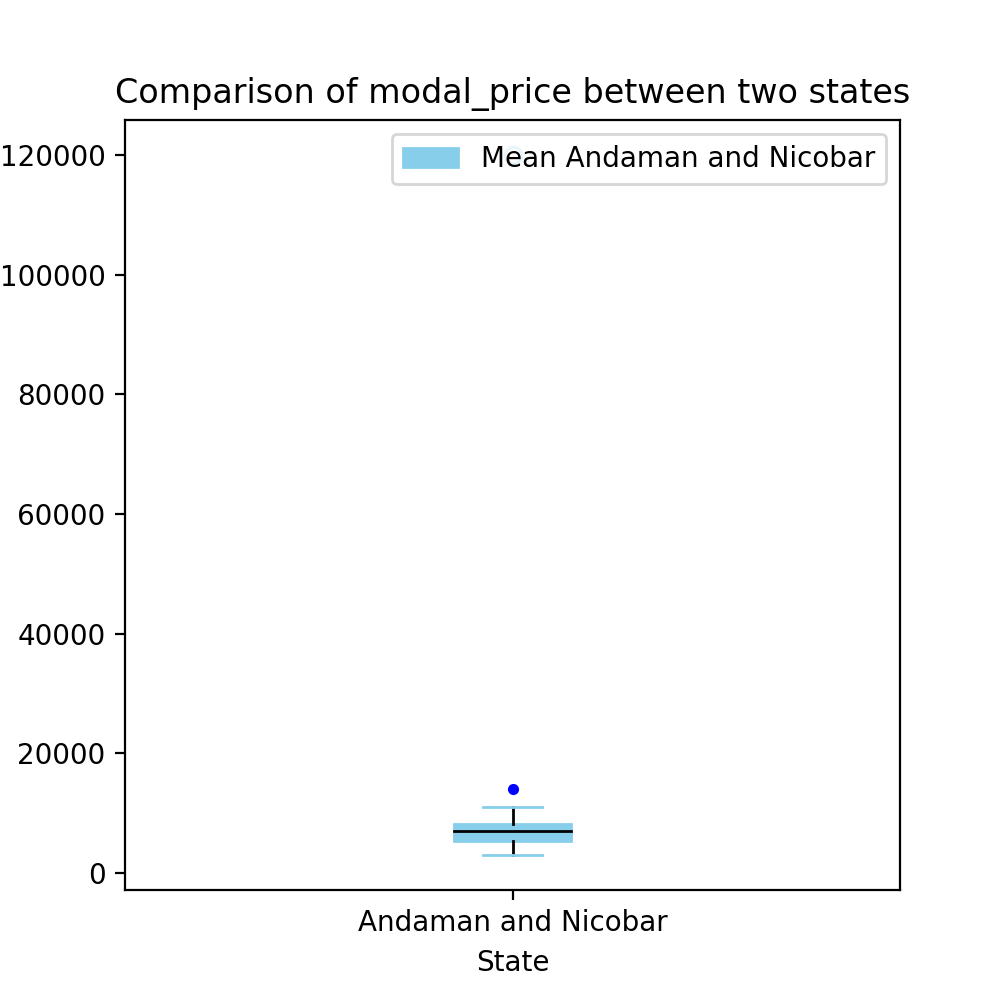

In [91]:
import numpy as np
import matplotlib.pyplot as plt

state1 = "Andaman and Nicobar"
state2 = "West Bengal"
group1 = data['modal_price'][data['state'] == state1]
group2 = data['modal_price'][data['state'] == state2]

fig, ax = plt.subplots(figsize =(5, 5))

# Create a box plot to compare the two groups
plt.boxplot(group1, labels=[state1], patch_artist=True,
            boxprops=dict(facecolor="skyblue", color="skyblue"),
            whiskerprops=dict(color="black"),
            capprops=dict(color="skyblue"),
            medianprops=dict(color="black"),
            flierprops=dict(markeredgecolor="skyblue"))

plt.xlabel("State")
plt.ylabel("modal_price")
plt.title("Comparison of modal_price between two states")

# Add mean values as points
plt.plot(1, np.mean(group1), marker="o", markersize=3, color="blue")

# Add a legend
import matplotlib.patches as mpatches
skyblue_patch = mpatches.Patch(color='skyblue', label= "Mean " + state1)

plt.legend(handles=[skyblue_patch], loc="upper right" )

# Print the t-test result
print("T-test p-value:", t_test[1])

plt.show()


T-test p-value: 0.16271500215752532


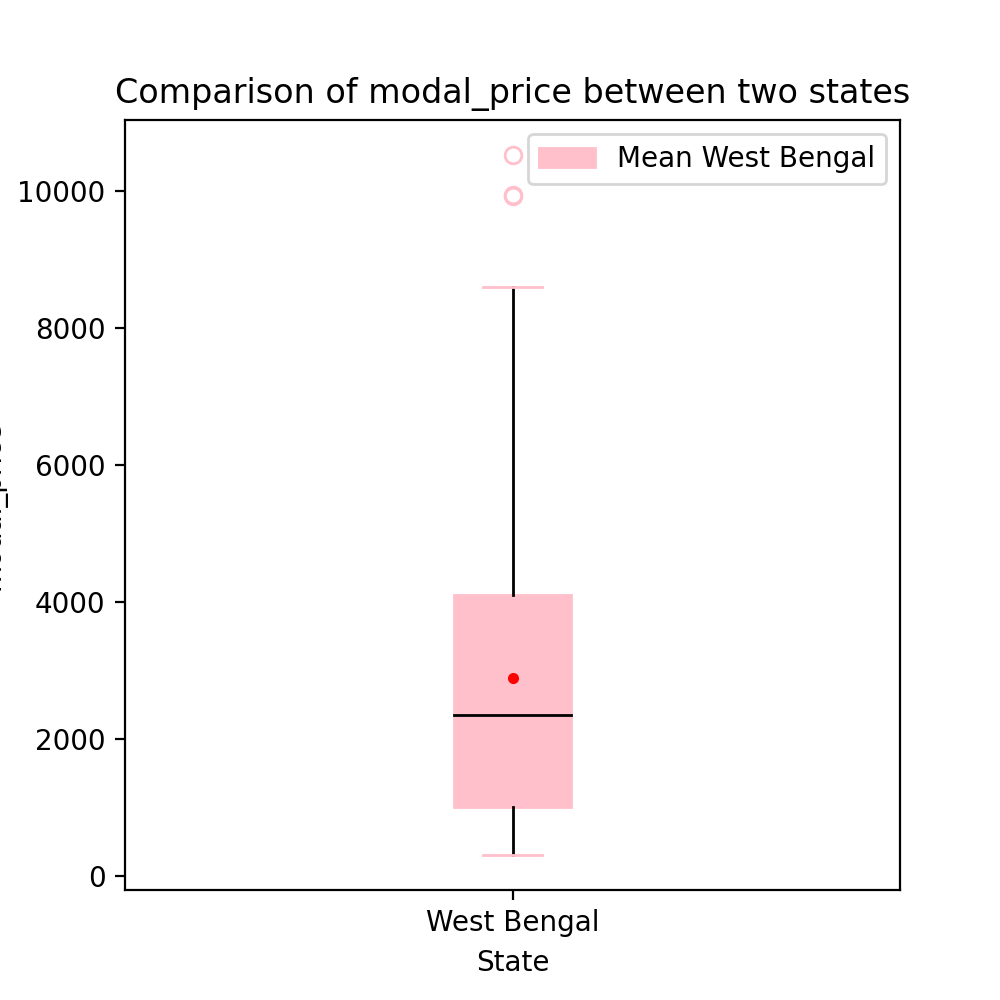

In [92]:
import numpy as np
import matplotlib.pyplot as plt

state1 = "Andaman and Nicobar"
state2 = "West Bengal"
group1 = data['modal_price'][data['state'] == state1]
group2 = data['modal_price'][data['state'] == state2]

fig, ax = plt.subplots(figsize =(5, 5))

# Create a box plot 

plt.boxplot(group2, labels=[state2], patch_artist=True,
            boxprops=dict(facecolor="pink", color="pink"),
            whiskerprops=dict(color="black"),
            capprops=dict(color="pink"),
            medianprops=dict(color="black"),
            flierprops=dict(markeredgecolor="pink"))

plt.xlabel("State")
plt.ylabel("modal_price")
plt.title("Comparison of modal_price between two states")

# Add mean values as points
plt.plot(1, np.mean(group2), marker="o", markersize=3, color="red")

# Add a legend
import matplotlib.patches as mpatches
pink_patch = mpatches.Patch(color='pink', label= "Mean " + state2)

plt.legend(handles=[pink_patch], loc="upper right" )

# Print the t-test result
print("T-test p-value:", t_test[1])

plt.show()


T-test p-value: 0.16271500215752532


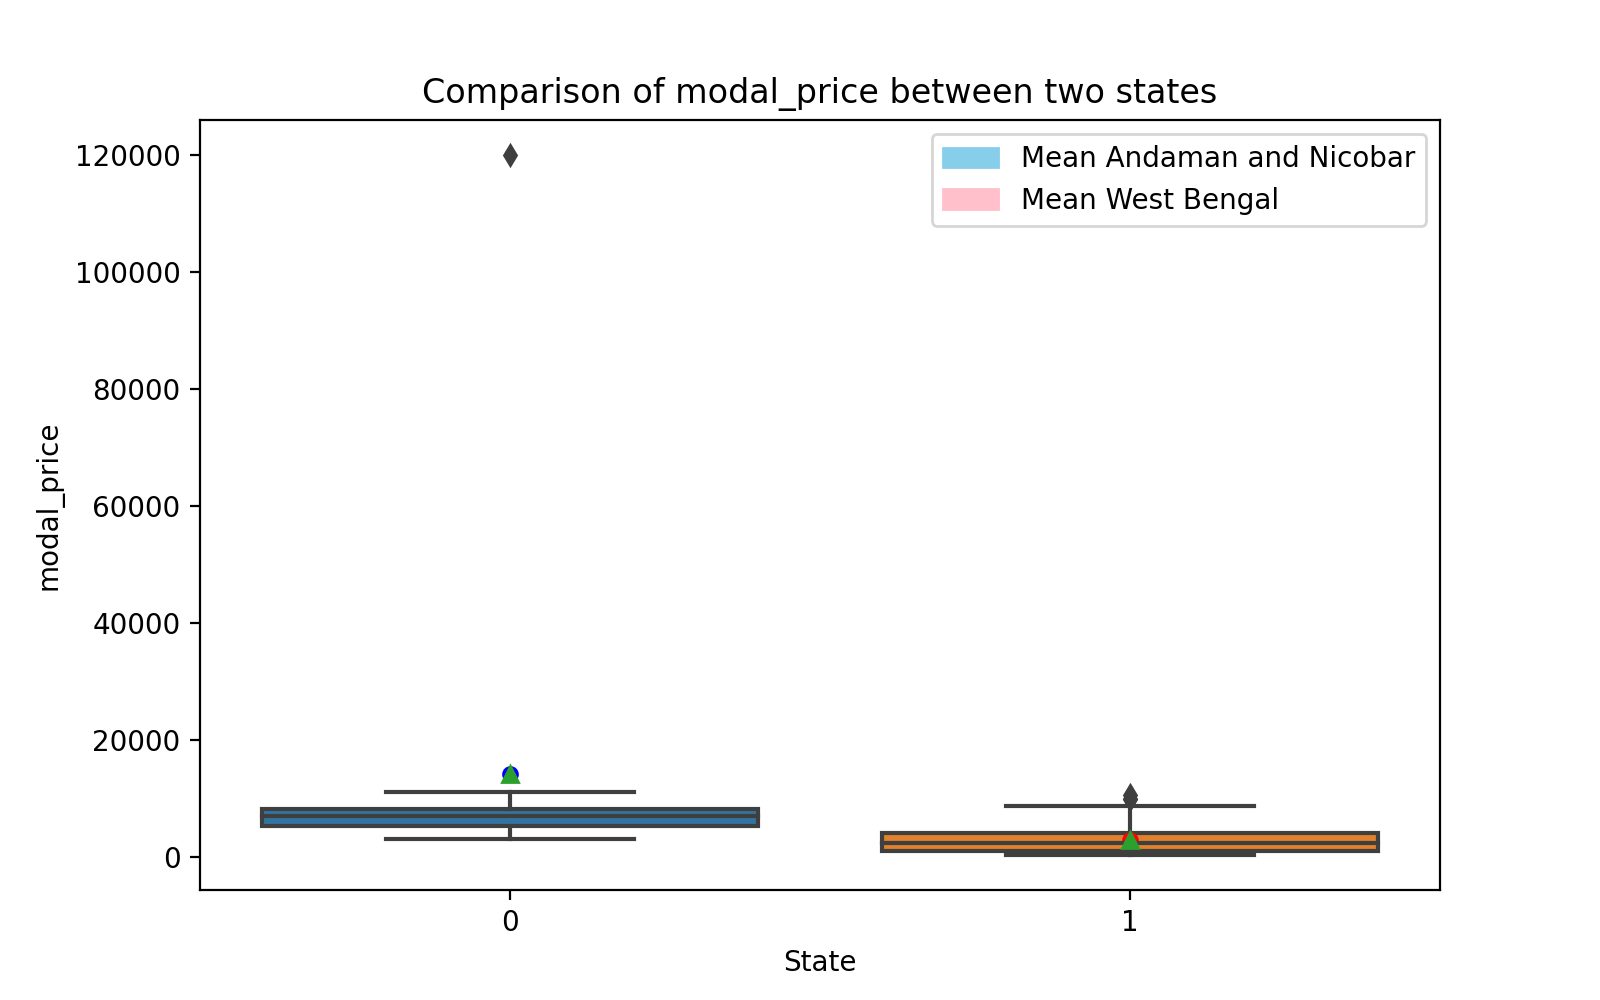

In [93]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize =(8, 5))

# Create a box plot to compare the two groups
sns.boxplot(
    data=[group1, group2], showmeans=True)
plt.xlabel("State")
plt.ylabel("modal_price")
plt.title("Comparison of modal_price between two states")

# Add mean values as points
plt.plot(0, np.mean(group1), marker="o", markersize=5, color="blue")
plt.plot(1, np.mean(group2), marker="o", markersize=5, color="red")

# Add a legend
import matplotlib.patches as mpatches
skyblue_patch = mpatches.Patch(color='skyblue', label= "Mean " + state1)
pink_patch = mpatches.Patch(color='pink', label= "Mean " + state2)

plt.legend(handles=[skyblue_patch, pink_patch], loc="upper right" )

# Print the t-test result
print("T-test p-value:", t_test[1])
plt.show()

## 11. Chi-square test:
#### Chi-Square Test:
The chi-square test is a statistical test used to determine if there is a significant association between two categorical variables. It compares the observed frequencies to the expected frequencies under the assumption of independence. It is commonly used to analyze contingency tables and assess the goodness-of-fit of a distribution.

In [94]:
import scipy.stats as stats
import pandas as pd

contingency_table = pd.crosstab(data['state'], data['market'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
# interpret p-value
print("p value is " + str(p))
print("X-squared =" + str(chi2))

p value is 0.0
X-squared =55900.0


## 12. ANOVA test:
#### ANOVA Test (Analysis of Variance):
The ANOVA test is a statistical test used to determine if there is a significant difference between the means of three or more groups. It assesses whether there is a significant variation among the group means by comparing the variance between groups with the variance within groups. ANOVA is commonly used in experimental studies or when comparing multiple groups simultaneously.

In [95]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('modal_price ~ market', data=data).fit()
table = sm.stats.anova_lm(model)
print(table)


              df        sum_sq       mean_sq         F        PR(>F)
market     325.0  7.881613e+09  2.425112e+07  2.049437  1.897071e-20
Residual  1910.0  2.260115e+10  1.183307e+07       NaN           NaN


ANOVA p-value: 1.8970712498926057e-20


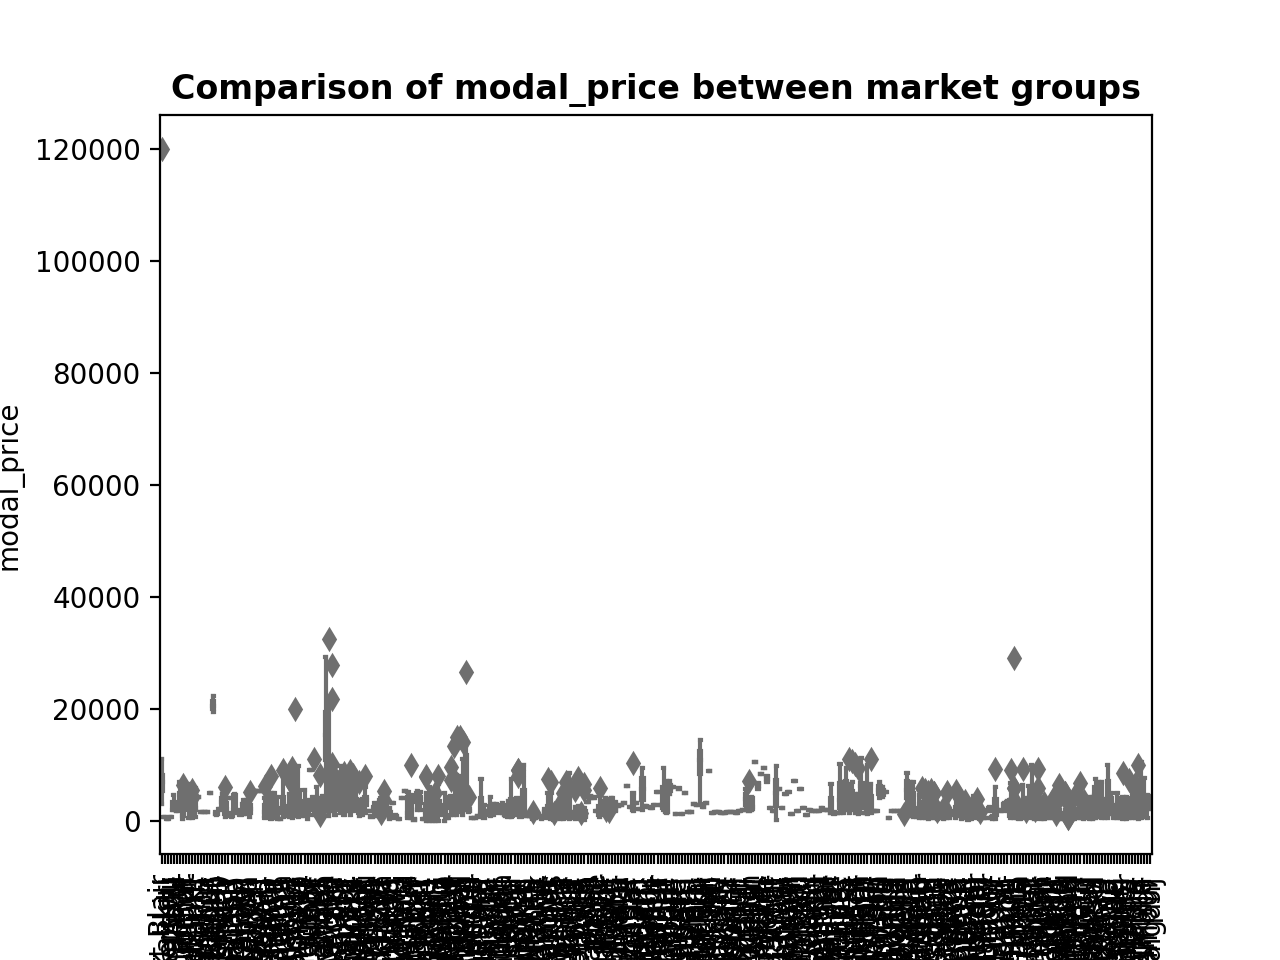

In [96]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

# Fit the linear model
model = ols('modal_price ~ market', data=data).fit()

# Perform ANOVA test
anova_result = sm.stats.anova_lm(model)

# Create a box plot to visualize the distributions of the different market groups
ax = sns.boxplot(x='market', y='modal_price', data=data, color='skyblue')
plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel('Market')
plt.ylabel('modal_price')
plt.title('Comparison of modal_price between market groups',
            fontweight = "bold")

# Print the ANOVA test result
print(f"ANOVA p-value: {anova_result['PR(>F)'][0]}")


ANOVA p-value: 1.8970712498926057e-20


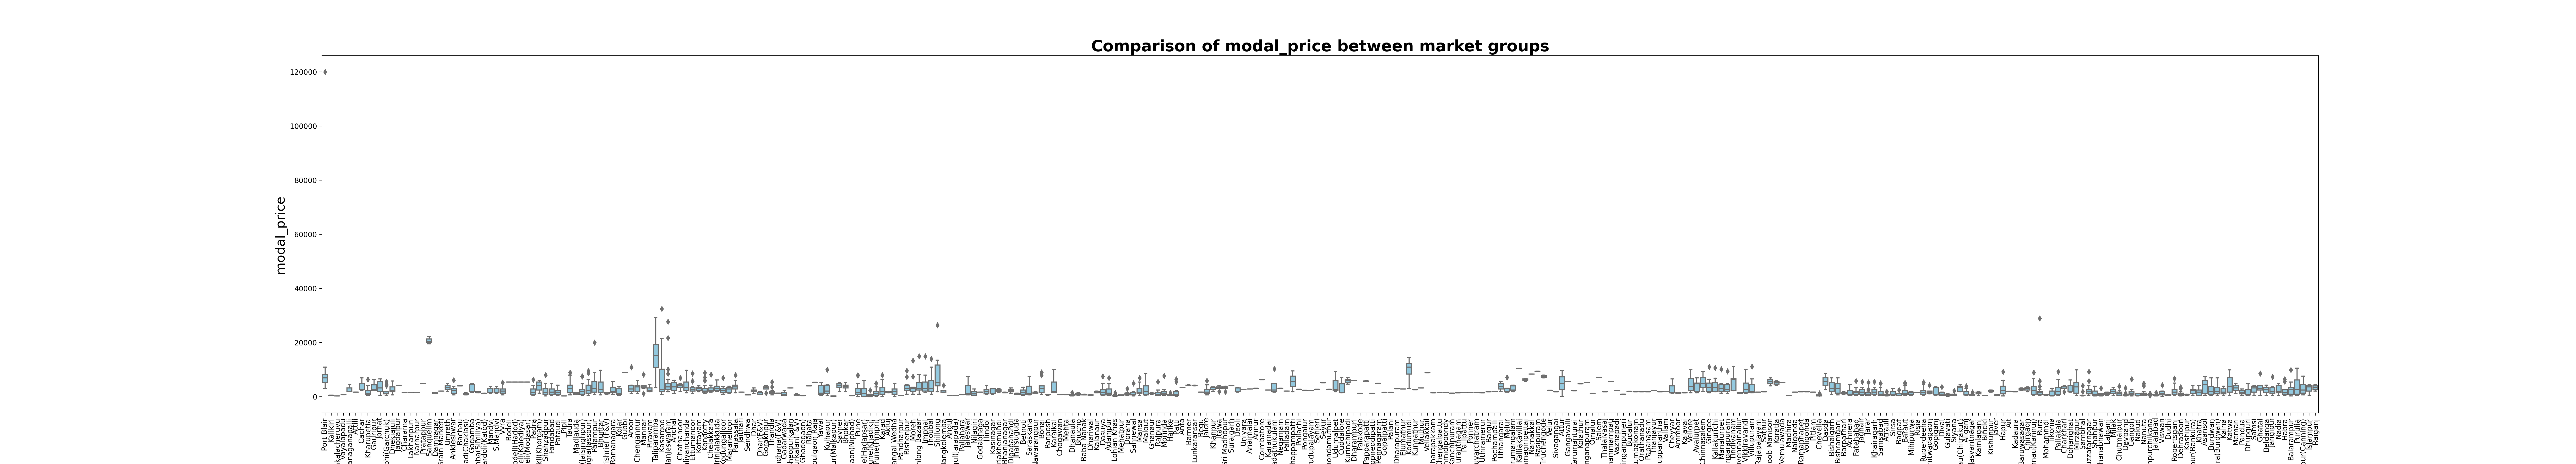

In [97]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

# Fit the linear model
model = ols('modal_price ~ market', data=data).fit()

# Perform ANOVA test
anova_result = sm.stats.anova_lm(model)
plt.figure(figsize=(50,9))
# Create a box plot to visualize the distributions of the different market groups
ax = sns.boxplot(x='market', y='modal_price', data=data, color='skyblue')
plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel('Market', fontsize=18)
plt.ylabel('modal_price', fontsize=18)
plt.title('Comparison of modal_price between market groups',
            fontsize=22,
            fontweight = "bold")

# Print the ANOVA test result
print(f"ANOVA p-value: {anova_result['PR(>F)'][0]}")
